# The Relationship Between Demographic Information and the Difference Between Expected and Actual Salary

**By:** Eugene Lim & Tyler Simms

**Introduction:** Cash is king. Whether one is just entering the workforce after college or has been employed for decades, the vast majority of people work a job. The reason is simple. Income is needed to survive and live a comfortable life. Therefore, salary should be important to everyone who earns a paycheck. The problem is that what certain postions should likely be paying as salary is not always what the employees in these positions actually make. Salary should be based on prestige, skill level, and merit. In reality, other factors also influence this salary number. One factor that is difficult not to consider is demographic information. Receiving benefits or disadvantages because of the qualities one is born with is always a relevant social issue. The discussion surrounding this issue often includes the areas of employment and salary. We will investigate the impact of demographics, in addition to education level, on salary figures through the use of data science techniques. Our investigation is titled "The Relationship Between Demogrpahic Information and the Difference Between Expected and Acutal Salary" and will walk through each step of the data science lifecycle. The two questions we hope to answer are "How do the qualities of a job position affect listed salary?" and "How does demographic information impact actual salary?" The analysis of the first question will look into variables affecting salary independant of any information about the individuals that might fill the roles. The analysis of the second question will consider how human qualities of the employees might create differences from expectations regarding salary. Our investigation will build to a machine learning regression model that will predict the salary of jobs based on characteristics of each job itself. A comparison will then be made between these predicted or expected salaries and the actual salaries of the individuals in these roles. The model and this comparison will help to answer the second question.

Hyperlink to github.io webstie: https://eugenelim17.github.io/

Link to dataset #1: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

Link to dataset #2: https://www.kaggle.com/datasets/masoomaalghawas/ask-a-manager-salary-survey-2021

Link to GitHub repo: https://github.com/eugenelim17/eugenelim17.github.io/tree/main

**Data Collection:**

In [1]:
!git clone https://github.com/eugenelim17/eugenelim17.github.io

Cloning into 'eugenelim17.github.io'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 133 (delta 28), reused 3 (delta 3), pack-reused 83
Receiving objects: 100% (133/133), 23.85 MiB | 25.36 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Displays a greater number of columns when dataframes are displayed
pd.set_option("display.max_columns", None)

# Reads in the first dataframe
job_postings_df = pd.read_csv("eugenelim17.github.io/job_postings.csv.zip", compression="zip")

# First dataframe before any cleaning or modification
job_postings_df

job_id  company_id                                  title  \
0        85008768         NaN               Licensed Insurance Agent   
1       133114754  77766802.0                          Sales Manager   
2       133196985   1089558.0                     Model Risk Auditor   
3       381055942  96654609.0                       Business Manager   
4       529257371   1244539.0                    NY Studio Assistant   
...           ...         ...                                    ...   
15881  3701373516  74718032.0                  Sanitation Technician   
15882  3701373522     38897.0                         Unit Secretary   
15883  3701373523     38897.0                Radiology Aide, Perdiem   
15884  3701373524      2623.0                            MRI Manager   
15885  3701373527     84659.0  Area Director of Business Development   

                                             description  max_salary  \
0      While many industries were hurt by the last fe...     52000.0   
1      Are you a dynamic and creative marketing profe...         NaN   
2      Join Us as a Model Risk Auditor – Showcase You...         NaN   
3      Business ManagerFirst Baptist Church ForneyFor...         NaN   
4      YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...         NaN   
...                                                  ...         ...   
15881  Location:\n\nWest Columbia, SC, US, 29172\n\n2...         NaN   
15882  Job Title: Unit Secretary\nDepartment: Nursing...         NaN   
15883  Job Title: Radiology Aide, Perdiem\nDepartment...         NaN   
15884  Grade 105\nJob Type: Officer of Administration...    135000.0   
15885  Nexion Health Management affiliates operate 56...         NaN   

       med_salary  min_salary pay_period formatted_work_type  \
0             NaN     45760.0     YEARLY           Full-time   
1             NaN         NaN        NaN           Full-time   
2             NaN         NaN        NaN            Contract   
3             NaN         NaN        NaN           Full-time   
4             NaN         NaN        NaN           Full-time   
...           ...         ...        ...                 ...   
15881         NaN         NaN        NaN           Part-time   
15882         NaN         NaN        NaN           Full-time   
15883         NaN         NaN        NaN           Part-time   
15884         NaN    110000.0     YEARLY           Full-time   
15885         NaN         NaN        NaN           Full-time   

                location  applies  original_listed_time  remote_allowed  \
0              Chico, CA      NaN          1.690000e+12             NaN   
1      Santa Clarita, CA      NaN          1.690000e+12             NaN   
2           New York, NY      1.0          1.690000e+12             NaN   
3             Forney, TX      NaN          1.690000e+12             NaN   
4           New York, NY      NaN          1.690000e+12             NaN   
...                  ...      ...                   ...             ...   
15881  West Columbia, SC      NaN          1.690000e+12             NaN   
15882        Teaneck, NJ      2.0          1.690000e+12             NaN   
15883        Teaneck, NJ      NaN          1.690000e+12             NaN   
15884       New York, NY      NaN          1.690000e+12             NaN   
15885      Vicksburg, MS      2.0          1.690000e+12             NaN   

       views                                    job_posting_url  \
0        5.0  https://www.linkedin.com/jobs/view/85008768/?t...   
1        NaN  https://www.linkedin.com/jobs/view/133114754/?...   
2       17.0  https://www.linkedin.com/jobs/view/133196985/?...   
3        NaN  https://www.linkedin.com/jobs/view/381055942/?...   
4        2.0  https://www.linkedin.com/jobs/view/529257371/?...   
...      ...                                                ...   
15881    1.0  https://www.linkedin.com/jobs/view/3701373516/...   
15882    7.0  https://www.linkedin.com/jobs/view/3701373522/...   
15883   

The investigation will be conducted using two datasets. Both of the datasets were chosen because they provide great detail and a high volume of both the number of observations and variables. The datasets are quite comprehensive and the creaters did significant due dilligence and were thorough with their methods in gathering the data for each observation.The first dataset, displayed above, includes 2023 LinkedIn job post listings over a two day period during the year. This dataset is from Kaggle and its title is "LinkedIn Job Postings - 2023". The dataset was collected by user Arsh Kon using LinkedIn's backend search API over the period July 23-24, 2023. The dataset has separate companion dataframes which add information about companies, industries, and benefits that follow the principles of tidy data. This dataset has several important variables we could use for analysis such as job title, job location, and the experience level of the job.

In [3]:
# Reads in the second dataframe
salaries_df = pd.read_csv("eugenelim17.github.io/2302023 Raw Data - Ask A Manager Salary Survey 2021.csv")

# Second dataframe before any cleaning or modification
salaries_df

Timestamp How old are you?  What industry do you work in?  \
0      4/27/2021 11:02:10            25-34   Education (Higher Education)   
1      4/27/2021 11:02:22            25-34              Computing or Tech   
2      4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3      4/27/2021 11:02:41            25-34                     Nonprofits   
4      4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   
...                   ...              ...                            ...   
27935  2/10/2023 16:15:00            25-34                      Oil & Gas   
27936  2/16/2023 19:14:37            25-34              Computing or Tech   
27937  2/16/2023 20:11:48            25-34   Engineering or Manufacturing   
27938  2/17/2023 17:58:48            25-34              Computing or Tech   
27939  2/21/2023 13:54:14            35-44    Marketing, Advertising & PR   

                                      Job title  \
0            Research and Instruction Librarian   
1      Change & Internal Communications Manager   
2                          Marketing Specialist   
3                               Program Manager   
4                            Accounting Manager   
...                                         ...   
27935                    Finance process Expert   
27936                               It manager    
27937                         Senior Engineer I   
27938                         software engineer   
27939                     Group Copy Supervisor   

      If your job title needs additional context, please clarify here:  \
0                                                    NaN                 
1                                                    NaN                 
2                                                    NaN                 
3                                                    NaN                 
4                                                    NaN                 
...                                                  ...                 
27935                                                NaN                 
27936                                                NaN                 
27937                 Automotive mechanical engineering                  
27938                                                NaN                 
27939                                                NaN                 

      What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)  \
0                                                 55,000                                                                                                                                                                                     
1                                                 54,600                                                                                                                                                                                     
2                                                 34,000                                                                                                                                                                                     
3                                                 62,000                                                                                                                                                                                     
4                                                 60,000                                                                                                                                                                                     
...                                                  ...                                                                                                         

The second dataset includes real survery responses that provide salary data and certain demographic information for different individuals. This dataset's important variables that we could use for analysis contain information about age, race, education, gender, experience, location, and salary. The second dataset is also from Kaggle and its title is "How Much Money Do You Make? Salary Survey". The dataset was taken from a Google Sheets spreadsheet that hosts the responses from a live survey created by Alison Green on AskAManager.org (Survey link: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html, Survey Results Spreadsheet: https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?resourcekey#gid=1625408792). The survey began on April 27, 2021 and is still accepting new responses.


**Data Processing (ETL) of "LinkedIn Job Postings - 2023" Dataset:**

In [4]:
# Displays first dataframe again
job_postings_df

job_id  company_id                                  title  \
0        85008768         NaN               Licensed Insurance Agent   
1       133114754  77766802.0                          Sales Manager   
2       133196985   1089558.0                     Model Risk Auditor   
3       381055942  96654609.0                       Business Manager   
4       529257371   1244539.0                    NY Studio Assistant   
...           ...         ...                                    ...   
15881  3701373516  74718032.0                  Sanitation Technician   
15882  3701373522     38897.0                         Unit Secretary   
15883  3701373523     38897.0                Radiology Aide, Perdiem   
15884  3701373524      2623.0                            MRI Manager   
15885  3701373527     84659.0  Area Director of Business Development   

                                             description  max_salary  \
0      While many industries were hurt by the last fe...     52000.0   
1      Are you a dynamic and creative marketing profe...         NaN   
2      Join Us as a Model Risk Auditor – Showcase You...         NaN   
3      Business ManagerFirst Baptist Church ForneyFor...         NaN   
4      YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...         NaN   
...                                                  ...         ...   
15881  Location:\n\nWest Columbia, SC, US, 29172\n\n2...         NaN   
15882  Job Title: Unit Secretary\nDepartment: Nursing...         NaN   
15883  Job Title: Radiology Aide, Perdiem\nDepartment...         NaN   
15884  Grade 105\nJob Type: Officer of Administration...    135000.0   
15885  Nexion Health Management affiliates operate 56...         NaN   

       med_salary  min_salary pay_period formatted_work_type  \
0             NaN     45760.0     YEARLY           Full-time   
1             NaN         NaN        NaN           Full-time   
2             NaN         NaN        NaN            Contract   
3             NaN         NaN        NaN           Full-time   
4             NaN         NaN        NaN           Full-time   
...           ...         ...        ...                 ...   
15881         NaN         NaN        NaN           Part-time   
15882         NaN         NaN        NaN           Full-time   
15883         NaN         NaN        NaN           Part-time   
15884         NaN    110000.0     YEARLY           Full-time   
15885         NaN         NaN        NaN           Full-time   

                location  applies  original_listed_time  remote_allowed  \
0              Chico, CA      NaN          1.690000e+12             NaN   
1      Santa Clarita, CA      NaN          1.690000e+12             NaN   
2           New York, NY      1.0          1.690000e+12             NaN   
3             Forney, TX      NaN          1.690000e+12             NaN   
4           New York, NY      NaN          1.690000e+12             NaN   
...                  ...      ...                   ...             ...   
15881  West Columbia, SC      NaN          1.690000e+12             NaN   
15882        Teaneck, NJ      2.0          1.690000e+12             NaN   
15883        Teaneck, NJ      NaN          1.690000e+12             NaN   
15884       New York, NY      NaN          1.690000e+12             NaN   
15885      Vicksburg, MS      2.0          1.690000e+12             NaN   

       views                                    job_posting_url  \
0        5.0  https://www.linkedin.com/jobs/view/85008768/?t...   
1        NaN  https://www.linkedin.com/jobs/view/133114754/?...   
2       17.0  https://www.linkedin.com/jobs/view/133196985/?...   
3        NaN  https://www.linkedin.com/jobs/view/381055942/?...   
4        2.0  https://www.linkedin.com/jobs/view/529257371/?...   
...      ...                                                ...   
15881    1.0  https://www.linkedin.com/jobs/view/3701373516/...   
15882    7.0  https://www.linkedin.com/jobs/view/3701373522/...   
15883   

In [5]:
# Dataframe data types before any adjustment to the types
job_postings_df.dtypes

job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

In [6]:
job_postings_df["job_id"] = job_postings_df["job_id"].astype(str)
job_postings_df["company_id"] = job_postings_df["company_id"].astype(str)

In [7]:
# Dataframe data types after adjustment to some of the types
job_postings_df.dtypes

job_id                         object
company_id                     object
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object
applies                       float64
original_listed_time          float64
remote_allowed                float64
views                         float64
job_posting_url                object
application_url                object
application_type               object
expiry                        float64
closed_time                   float64
formatted_experience_level     object
skills_desc                    object
listed_time                   float64
posting_domain                 object
sponsored                       int64
work_type                      object
currency                       object
compensation

Listed above are the variables in the dataframe and their data types. We have changed the data type of job_id and company_id to object since IDs are a categorical variable. No other data types need to be changed.

In [8]:
# Confirms that all observations without a compensation type value also have no maximum, median, or minimum salary
job_postings_df[job_postings_df['compensation_type'].isnull()]
job_postings_df[job_postings_df['compensation_type'].isnull()]["max_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["med_salary"].isnull().sum()
job_postings_df[job_postings_df['compensation_type'].isnull()]["min_salary"].isnull().sum()

# Rows that do not have a compensation type are removed here using .notna()
job_postings_df = job_postings_df[job_postings_df['compensation_type'].notna()].copy()

Our next step of the data cleaning for this dataset was to ensure that all the job post observations we are using have a compensation type value included. We identified that every observation without a compensation type value also has no maximium salary, minimum salary, and median salary. Job postings without salary information are essentially useless in our analysis because salary information is vital. When looking at the dataset, 9,348 job postings did not include a compensation value. So in order to get rid of these rows without a compensation type, we have used the .notna() function.

In [9]:
# Any salary that is on an hourly basis is adjusted to a yearly salary by multiplying by 40 since that is the American national standard for weekly hours worked
# and then multiplying by 52 because there are 52 weeks in a year.
job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 40 * 52 if row['pay_period'] == 'HOURLY' else row['min_salary'], axis=1)

job_postings_df['max_salary'] = job_postings_df.apply(lambda row: row['max_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['max_salary'], axis=1)
job_postings_df['med_salary'] = job_postings_df.apply(lambda row: row['med_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['med_salary'], axis=1)
job_postings_df['min_salary'] = job_postings_df.apply(lambda row: row['min_salary'] * 12 if row['pay_period'] == 'MONTHLY' else row['min_salary'], axis=1)

job_postings_df['pay_period'] = 'Yearly'

After removing the rows with no compensation type, we see that there are three different compensation types: hourly, monthly, and yearly. The salaries among job listings are much easier to compare if the salaries are all one compensation type, so we decided to convert all the salaries to yearly salaries. This conversion is done by multiplying any salary that is hourly by 40 since that is the American standard of hours worked per week, and then multiplying by 52 since there are 52 weeks in a year. Any salary that is monthly is multiplied by 12 since there are 12 months in a year.

In [10]:
# Fill the "remote_allowed" column for in-person workers with a value of 0
job_postings_df['remote_allowed'] = job_postings_df['remote_allowed'].fillna(0)

In the dataframe, we identified that job listings have a value of 1 in the "remote_allowed" column if they are remote positions, but if they are in person then they have a value of NaN in the column. We gave these in-person positions a value of 0 by simply using the .fillna() function with an argument of 0.

In [11]:
job_postings_df.duplicated().sum()

0

The dataframe has no duplicates.

In [12]:
# Displays first dataframe after cleaning
job_postings_df

job_id  company_id  \
0        85008768         nan   
5       903408693   3894635.0   
8      1029078768     61469.0   
12     1535492735         nan   
13     1657978824  89350959.0   
...           ...         ...   
15871  3701373385  18312164.0   
15875  3701373427   1321042.0   
15876  3701373432   2121817.0   
15878  3701373493      5619.0   
15884  3701373524      2623.0   

                                                   title  \
0                               Licensed Insurance Agent   
5                                       Office Associate   
8                       Registered Nurse (RN) Vaccinator   
12                              Administrative Assistant   
13     REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...   
...                                                  ...   
15871                                      Sales Manager   
15875                                      Design Intern   
15876                  Continuous Improvement Specialist   
15878         Sr. Bilingual Copywriter (Canadian French)   
15884                                        MRI Manager   

                                             description  max_salary  \
0      While many industries were hurt by the last fe...     52000.0   
5      Provide clerical and administrative support to...     42000.0   
8      United Staffing Solutions is partnering with o...    104000.0   
12     We are looking for a responsible Administrativ...     41600.0   
13     REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...    144000.0   
...                                                  ...         ...   
15871  Sales ManagerTexas, US $60,000–$70,000OTE $250...     70000.0   
15875  Looking to redefine the skyline or to be a par...     49691.2   
15876  Continuous Improvement Specialist Opportunity!...         NaN   
15878  Overview\nTHE ROLE:\nThe Senior Bilingual Copy...    105200.0   
15884  Grade 105\nJob Type: Officer of Administration...    135000.0   

       med_salary  min_salary pay_period formatted_work_type  \
0             NaN     45760.0     Yearly           Full-time   
5             NaN     37000.0     Yearly           Full-time   
8             NaN    104000.0     Yearly           Part-time   
12            NaN     37440.0     Yearly           Part-time   
13            NaN    144000.0     Yearly            Contract   
...           ...         ...        ...                 ...   
15871         NaN     60000.0     Yearly           Full-time   
15875         NaN     39686.4     Yearly          Internship   
15876    200000.0         NaN     Yearly           Full-time   
15878         NaN     91900.0     Yearly           Full-time   
15884         NaN    110000.0     Yearly           Full-time   

                         location  applies  original_listed_time  \
0                       Chico, CA      NaN          1.690000e+12   
5                      Albany, GA      5.0          1.690000e+12   
8                    Muskegon, MI      NaN          1.690000e+12   
12                      Ocoee, FL      3.0          1.690000e+12   
13           Texas, United States      NaN          1.690000e+12   
...                           ...      ...                   ...   
15871        Texas, United States      7.0          1.690000e+12   
15875                 Miramar, FL      2.0          1.690000e+12   
15876  Mississippi, United States     11.0          1.690000e+12   
15878                Torrance, CA      4.0          1.690000e+12   
15884                New York, NY      NaN          1.690000e+12   

       remote_allowed  views  \
0                 0.0    5.0   
5                 0.0   49.0   
8                 0.0    4.0   
12                0.0    5.0   
13                1.0    NaN   
...               ...    ...   
15871             1.0   56.0   
15875             0.0   20.0   
15876             0.0   28.0   
15878             0.0   29.0   
15884             0.0   10.0   

                                         job_posting_url 

**Preliminary Exploratory Analysis & Data Visualization (EDA) of "LinkedIn Job Postings - 2023" Dataset:**

We will conduct some general preliminary EDA on this first dataset to verify that the dataset contains realistic data by getting a sense of how the data is distributed. This EDA does not relate directly to our questions but is necessary to demonstrate that the dataset is fit for our investigation's analysis.

In [13]:
# Makes average salary column because controlled analysis has too few observations for "med_salary"
job_postings_df["avg_salary"] = (job_postings_df["max_salary"] + job_postings_df["min_salary"]) / 2

# Create new filtered dataframes to help calculate summary statistics for remote and in-person workers based on yearly median salary
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
in_person = job_postings_df[job_postings_df['remote_allowed'] == 0]

# Summary statistics for remote workers
summary_remote = remote_workers['avg_salary'].describe()

# Summary statistics for in-person workers
summary_in_person = in_person['avg_salary'].describe()

# Print the summary statistics
print("Summary Statistics for Remote Positions:")
print(summary_remote)

# Setting option to display numbers in normal notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("\nSummary Statistics for In-Person Positions:")
print(summary_in_person)

Summary Statistics for Remote Positions:
count       897.000000
mean     115667.544621
std       65507.056828
min          23.000000
25%       75000.000000
50%      109200.000000
75%      145600.000000
max      875000.000000
Name: avg_salary, dtype: float64

Summary Statistics for In-Person Positions:
count      4624.000
mean      95899.397
std       56219.278
min          13.500
25%       55000.000
50%       82500.000
75%      122790.000
max     1050000.000
Name: avg_salary, dtype: float64


When comparing the two types of workers by their summary statistics, we can see that the remote positions have a considerably higher mean average salary (115,667.54 USD) compared to in-person positions (95,899.40 USD). The difference is almost 20,000 USD. Both categories also have relatively high standard deviations, which indicates a wide variation in salaries, but remote postions have the higher standard deviation of the two. The higher standard deviation for remote positions is likely due to there being less remote positions with a value in the average salary column than in-person positions. We can already predict both categories' distributions will be skewed right in a histogram, since the means for both types of workers are greater than their medians, which are seen from the 50th percentile. The main interesting result we see when comparing the two types of positions is the higher mean average salary for remote positions compared to that of the in-person positions which we discussed above.

In [14]:
# Assuming 'remote_allowed' is the column indicating remote work and 'title' is the column containing job titles
# Filter data for remote and in-person workers
remote_workers = job_postings_df[job_postings_df['remote_allowed'] == 1]
in_person = job_postings_df[job_postings_df['remote_allowed'] == 0]

# Get unique job titles for remote and in-person workers
remote_job_titles = set(remote_workers['title'].unique())
in_person_job_titles = set(in_person['title'].unique())

# Find common job titles between remote and in-person workers
common_job_titles = remote_job_titles.intersection(in_person_job_titles)

# DataFrames for common job titles
remote_common_jobs = remote_workers[remote_workers['title'].isin(common_job_titles)].copy()
in_person_common_jobs = in_person[in_person['title'].isin(common_job_titles)].copy()

print("Common Job Titles:")
print(common_job_titles)

# Print the summary statistics for remote and in-person workers with common job titles
print("\nSummary Statistics for Remote Positions with Common Job Titles:")
print(remote_common_jobs['avg_salary'].describe())

print("\nSummary Statistics for In-Person Positions with Common Job Titles:")
print(in_person_common_jobs['avg_salary'].describe())

Common Job Titles:
{'Human Resources Business Partner', 'Digital Marketing Specialist', 'Video Editor', 'Quality Assurance Analyst', 'Senior Test Engineer', 'Systems Administrator', 'Business Development Representative', 'Senior Financial Analyst', 'Compliance Specialist', 'Scoring Content Specialist', 'Corporate Accountant', 'Sales Account Manager', 'Human Resources Assistant', 'Remote Medical Device Supplier Engineer', 'Senior Accountant', 'Senior Tax Manager', 'Contract Attorney', 'Information Security Analyst', 'Sales And Marketing Specialist', 'Field Operations Manager', 'Logistics Coordinator', 'Senior Software Engineer', 'Production Artist', 'Human Resources Director', 'Senior Business Analyst', 'Technical Writer', 'Network Engineer', 'B2B Sales Representative', 'Mental Health Therapist', 'Analyst, Compensation Operations', 'Senior Data Analyst', 'Senior Data Engineer', 'Full Stack Engineer', 'Director of Product, MyBSWHealth', 'Senior Product Designer', 'Network Administrator',

We have again displayed the summary statistics for salary of remote and in-person positions, however this time we have controlled both groups to include only job titles that have at least one listing as a remote position and one listing as an in-person position. This time the salary numbers are also an average of the maximum and minimum salary as the median salary column has too many null values after controlling for intersecting job titles. The average salary for remote positions is 102,119 USD, which is higher than that for in-person positions at 94,210 USD. Both remote and in-person positions exhibit relatively low variability in average salaries compared to the uncontrolled results. The relatively small sample sizes may contribute to the observed variability in average salaries. More data points would provide a more stable estimate of the central tendency and spread of salaries for these common job titles. When comparing the quartiles, for remote positions, 25% of the remote positions have an average salary less than or equal to 67,500 USD, 50% of remote positions have an average salary less than or equal to 92,500 USD, and 75% of remote positions have an average salary less than or equal to 143,300 USD. For in-person positions, 25% of in-person positions have an average salary less than or equal to 57,500 USD, 50% of in-person positions have an average salary less than or equal to 87,500 USD, and 75% of in-person positions have an average salary less than or equal to 119,600 USD. We can see that remote positions generally have higher quartile values compared to in-person positions. This suggests that, on average, remote positions tend to offer higher salaries. The spread in average salaries is wider for in-person positions compared to remote positions, indicating less variability in remote position salaries.

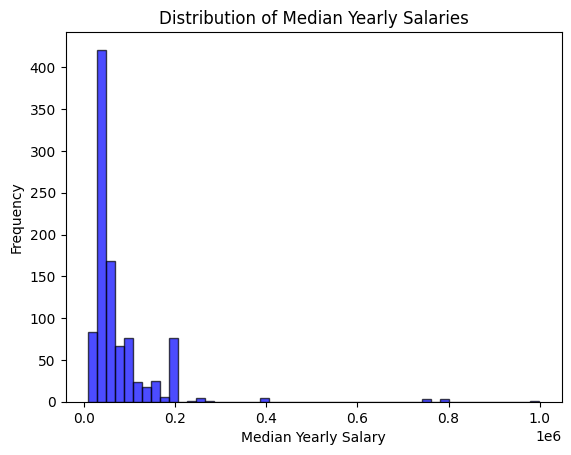

In [15]:
job_postings_df['med_salary'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries')
plt.xlabel('Median Yearly Salary')
plt.ylabel('Frequency')
plt.show()

Shown above is a histogram which shows the distribution of median yearly salaries. The distribution is orginally skewed heavily to the right without any transformations because a majority of salaries are less than 100,000 USD, with few job post listings having a salary even as high as 150,000 USD.

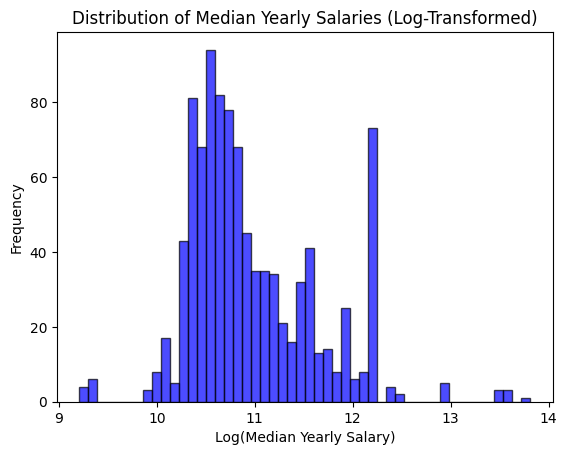

In [16]:
job_postings_df['med_salary_log'] = np.log1p(job_postings_df['med_salary'])
job_postings_df['med_salary_log'].plot.hist(bins=50, color='blue', alpha=0.7, edgecolor='black', title='Distribution of Median Yearly Salaries (Log-Transformed)')

# Set labels and title
plt.xlabel('Log(Median Yearly Salary)')
plt.ylabel('Frequency')
plt.show()

To improve the skew we have applied a logarithmic transformation, by broadcasting over each of the median salaries, which makes the histogram look much more symmetrical. The distribution is still right skewed to a certain degree. An interesting conclusion from this histrogram is that although the right skew of the distribution does smooth out while moving up the x-axis in a relatively normal way, we see that there is a significant spike around 12 in the median yearly salary. We predicted that there would be one parabolic curve within the graph, but there appears to be a lot of jobs in the market that pay around the 200,000 USD range (This x-axis value is taken from the original histogram before any transformations). This histogram is relevant to gaining a better understanding of the overall distribution of median yearly salaries and can be applied on smaller subsets of the dataframe after filtering on certain columns to visualize the differences in the distribution for each of these subsets.

In [17]:
# Define the mapping from job titles to industries
job_title_to_industry_mapping = {
    "Warehouse Order Selector": "Warehouse",
    "Package Handler (Warehouse like)": "Warehouse",
    "Warehouse Associate": "Warehouse",
    "Warehouse Worker - SAS Safety Corp.": "Warehouse",
    "Equipment Technician": "Technician",
    "Field Service Technician": "Technician",
    "Pest Control Technician": "Technician",
    "Central Services Technician": "Technician"
}

# Use the .replace() method to create the 'industries' column
job_postings_df['industries'] = job_postings_df['title'].replace(job_title_to_industry_mapping)

Here a map called "Industries" is created, where eight occupations are organized inside a dictionary based on what general type of job they are. The two job types in this example are "Warehouse" and "Technician".

In [18]:
selected_industries = ["Warehouse", "Technician"]
filtered_df = job_postings_df[job_postings_df['industries'].isin(selected_industries)].copy()

# Summary statistics for "med_salary" for each industry
summary_statistics = filtered_df.groupby('industries')['med_salary'].describe()

# Print the summary statistics
print(summary_statistics)


            count      mean       std       min       25%       50%       75%  \
industries                                                                      
Technician 11.000 50196.218 12715.308 41600.000 42500.000 42640.000 50679.200   
Warehouse  16.000 41233.800 12502.981 31200.000 33280.000 38740.000 41459.600   

                 max  
industries            
Technician 75000.000  
Warehouse  82000.000  


We used .groupby() and .describe() to compare the summary statistics between technicians and warehouse workers. As seen from the summary statistics, the "Technician" industry generally offers the higher average median salary, with an average of 50,196.22 USD, but with a higher standard deviation. The "Warehouse" industry has a lower average median salary of 41,233.80 USD, and has a slightly lower, but similar variation in salary. In both industries, there is a wide range of median salaries, with the maximum salaries being significantly higher than the average. This fact suggests that some job postings within these industries offer very high salaries relative to the rest of the job postings. One important detail we can see here is that the "Warehouse" industry, despite having a lower average median salary compared to the "Technician" industry, has a higher maximum value. In the "Warehouse" industry, the maximum salary is 82,000 USD, while in the "Technician" industry, it's 75,000 USD. This inconsistent statistic reflects that a substantial portion of workers in the "Warehouse" industry receive salaries significantly below this maximum value, as the average, minimum, 25th quartile, 50th quartile, and 75th quartile salary all favor the "Technician" industry, and also indicates that there's a relatively lower floor for salaries in the "Warehouse" industry. This analysis reaffirms our previous understanding that the maximum median salary is an unrealistic amount for most workers in the "Warehouse" industry, the same being true to a slightly lesser extent for the "Technician" industry. Another interesting statistic is that the minimum median salary for the "Technician" industry is still greater than the average value for the "Warehouse" industry. The comparison of these industries' summary statistics for median yearly salary is relevant to the question about the best and worst industries for compensation.

In [19]:
# Displays first dataframe after preliminary EDA
job_postings_df

job_id  company_id  \
0        85008768         nan   
5       903408693   3894635.0   
8      1029078768     61469.0   
12     1535492735         nan   
13     1657978824  89350959.0   
...           ...         ...   
15871  3701373385  18312164.0   
15875  3701373427   1321042.0   
15876  3701373432   2121817.0   
15878  3701373493      5619.0   
15884  3701373524      2623.0   

                                                   title  \
0                               Licensed Insurance Agent   
5                                       Office Associate   
8                       Registered Nurse (RN) Vaccinator   
12                              Administrative Assistant   
13     REMOTE STEEL BUILDING SALES MAKE $1,000 TO $30...   
...                                                  ...   
15871                                      Sales Manager   
15875                                      Design Intern   
15876                  Continuous Improvement Specialist   
15878         Sr. Bilingual Copywriter (Canadian French)   
15884                                        MRI Manager   

                                             description  max_salary  \
0      While many industries were hurt by the last fe...   52000.000   
5      Provide clerical and administrative support to...   42000.000   
8      United Staffing Solutions is partnering with o...  104000.000   
12     We are looking for a responsible Administrativ...   41600.000   
13     REMOTE WORK FROM HOME $1,000 TO $10,000 COMMIS...  144000.000   
...                                                  ...         ...   
15871  Sales ManagerTexas, US $60,000–$70,000OTE $250...   70000.000   
15875  Looking to redefine the skyline or to be a par...   49691.200   
15876  Continuous Improvement Specialist Opportunity!...         NaN   
15878  Overview\nTHE ROLE:\nThe Senior Bilingual Copy...  105200.000   
15884  Grade 105\nJob Type: Officer of Administration...  135000.000   

       med_salary  min_salary pay_period formatted_work_type  \
0             NaN   45760.000     Yearly           Full-time   
5             NaN   37000.000     Yearly           Full-time   
8             NaN  104000.000     Yearly           Part-time   
12            NaN   37440.000     Yearly           Part-time   
13            NaN  144000.000     Yearly            Contract   
...           ...         ...        ...                 ...   
15871         NaN   60000.000     Yearly           Full-time   
15875         NaN   39686.400     Yearly          Internship   
15876  200000.000         NaN     Yearly           Full-time   
15878         NaN   91900.000     Yearly           Full-time   
15884         NaN  110000.000     Yearly           Full-time   

                         location  applies  original_listed_time  \
0                       Chico, CA      NaN     1690000000000.000   
5                      Albany, GA    5.000     1690000000000.000   
8                    Muskegon, MI      NaN     1690000000000.000   
12                      Ocoee, FL    3.000     1690000000000.000   
13           Texas, United States      NaN     1690000000000.000   
...                           ...      ...                   ...   
15871        Texas, United States    7.000     1690000000000.000   
15875                 Miramar, FL    2.000     1690000000000.000   
15876  Mississippi, United States   11.000     1690000000000.000   
15878                Torrance, CA    4.000     1690000000000.000   
15884                New York, NY      NaN     1690000000000.000   

       remote_allowed  views  \
0               0.000  5.000   
5               0.000 49.000   
8               0.000  4.000   
12              0.000  5.000   
13              1.000    NaN   
...               ...    ...   
15871           1.000 56.000   
15875           0.000 20.000   
15876           0.000 28.000   
15878           0.000 29.000   
15884           0.000 10.000   

                                         job_posting_url 

After this quick look into the distribution of the data with regard to salary, we can see that the dataframe is useable for the purposes of our investigation.

**Data Processing (ETL) of "How Much Money Do You Make? Salary Survey" Dataset:**

In [20]:
# Displays the second dataset again in its original state
salaries_df

Timestamp How old are you?  What industry do you work in?  \
0      4/27/2021 11:02:10            25-34   Education (Higher Education)   
1      4/27/2021 11:02:22            25-34              Computing or Tech   
2      4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3      4/27/2021 11:02:41            25-34                     Nonprofits   
4      4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   
...                   ...              ...                            ...   
27935  2/10/2023 16:15:00            25-34                      Oil & Gas   
27936  2/16/2023 19:14:37            25-34              Computing or Tech   
27937  2/16/2023 20:11:48            25-34   Engineering or Manufacturing   
27938  2/17/2023 17:58:48            25-34              Computing or Tech   
27939  2/21/2023 13:54:14            35-44    Marketing, Advertising & PR   

                                      Job title  \
0            Research and Instruction Librarian   
1      Change & Internal Communications Manager   
2                          Marketing Specialist   
3                               Program Manager   
4                            Accounting Manager   
...                                         ...   
27935                    Finance process Expert   
27936                               It manager    
27937                         Senior Engineer I   
27938                         software engineer   
27939                     Group Copy Supervisor   

      If your job title needs additional context, please clarify here:  \
0                                                    NaN                 
1                                                    NaN                 
2                                                    NaN                 
3                                                    NaN                 
4                                                    NaN                 
...                                                  ...                 
27935                                                NaN                 
27936                                                NaN                 
27937                 Automotive mechanical engineering                  
27938                                                NaN                 
27939                                                NaN                 

      What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)  \
0                                                 55,000                                                                                                                                                                                     
1                                                 54,600                                                                                                                                                                                     
2                                                 34,000                                                                                                                                                                                     
3                                                 62,000                                                                                                                                                                                     
4                                                 60,000                                                                                                                                                                                     
...                                                  ...                                                                                                         

In [21]:
# Changes column titles
salaries_df.columns = ["Timestamp", "Age", "Industry", "Job Title", "Additional Job Title Context", "Annual Salary", "Additional Compensation", "Currency",
                       "Other Currency Type", "Additional Income Context", "Country", "U.S. State", "City", "Professional Experience Overall",
                       "Professional Experience In Field", "Education", "Gender", "Race"]

salaries_df

Timestamp    Age                       Industry  \
0      4/27/2021 11:02:10  25-34   Education (Higher Education)   
1      4/27/2021 11:02:22  25-34              Computing or Tech   
2      4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
3      4/27/2021 11:02:41  25-34                     Nonprofits   
4      4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   
...                   ...    ...                            ...   
27935  2/10/2023 16:15:00  25-34                      Oil & Gas   
27936  2/16/2023 19:14:37  25-34              Computing or Tech   
27937  2/16/2023 20:11:48  25-34   Engineering or Manufacturing   
27938  2/17/2023 17:58:48  25-34              Computing or Tech   
27939  2/21/2023 13:54:14  35-44    Marketing, Advertising & PR   

                                      Job Title  \
0            Research and Instruction Librarian   
1      Change & Internal Communications Manager   
2                          Marketing Specialist   
3                               Program Manager   
4                            Accounting Manager   
...                                         ...   
27935                    Finance process Expert   
27936                               It manager    
27937                         Senior Engineer I   
27938                         software engineer   
27939                     Group Copy Supervisor   

             Additional Job Title Context Annual Salary  \
0                                     NaN        55,000   
1                                     NaN        54,600   
2                                     NaN        34,000   
3                                     NaN        62,000   
4                                     NaN        60,000   
...                                   ...           ...   
27935                                 NaN         25000   
27936                                 NaN         55000   
27937  Automotive mechanical engineering          87000   
27938                                 NaN         64000   
27939                                 NaN        150000   

       Additional Compensation Currency Other Currency Type  \
0                        0.000      USD                 NaN   
1                     4000.000      GBP                 NaN   
2                          NaN      USD                 NaN   
3                     3000.000      USD                 NaN   
4                     7000.000      USD                 NaN   
...                        ...      ...                 ...   
27935                    0.000      USD                 NaN   
27936                      NaN      USD                 NaN   
27937                 7000.000      USD                 NaN   
27938                    0.000      USD                 NaN   
27939                      NaN      USD                 NaN   

      Additional Income Context         Country      U.S. State  \
0                           NaN   United States   Massachusetts   
1                           NaN  United Kingdom             NaN   
2                           NaN              US       Tennessee   
3                           NaN             USA       Wisconsin   
4                           NaN              US  South Carolina   
...                         ...             ...             ...   
27935                       NaN        Colombia             NaN   
27936                       NaN  United States             Ohio   
27937                       NaN  United States         New York   
27938                       NaN         denmark             NaN   
27939                       NaN              US        New York   

                City Professional Experience Overall  \
0             Boston                       5-7 years   
1          Cambridge                    8 - 10 years   
2        Chattanooga                     2 - 4 years   
3          Milwaukee                    8 - 10 years   
4         Greenville                    8 - 10 

Before checking dtypes, the column titles needed to be changed as they were too long and formated as questions from the survey. The titles are now short and concise.

In [22]:
# Dataframe data types before any adjustment to the types
salaries_df.dtypes

Timestamp                            object
Age                                  object
Industry                             object
Job Title                            object
Additional Job Title Context         object
Annual Salary                        object
Additional Compensation             float64
Currency                             object
Other Currency Type                  object
Additional Income Context            object
Country                              object
U.S. State                           object
City                                 object
Professional Experience Overall      object
Professional Experience In Field     object
Education                            object
Gender                               object
Race                                 object
dtype: object

In [23]:
salaries_df["Annual Salary"] = salaries_df["Annual Salary"].str.replace(",","").astype(float)

In [24]:
# Dataframe data types after adjustment to one of the types
salaries_df.dtypes

Timestamp                            object
Age                                  object
Industry                             object
Job Title                            object
Additional Job Title Context         object
Annual Salary                       float64
Additional Compensation             float64
Currency                             object
Other Currency Type                  object
Additional Income Context            object
Country                              object
U.S. State                           object
City                                 object
Professional Experience Overall      object
Professional Experience In Field     object
Education                            object
Gender                               object
Race                                 object
dtype: object

Listed above are the variables in the dataframe and their data types. We have changed the data type of Annual Salary to float64 as the data type was previously object due to some of the salary values having commas. No other data types need to be changed.

In [25]:
# Removes salaries not in USD
salaries_df = salaries_df[salaries_df["Currency"] == "USD"].copy()

We have removed salaries not in USD as these observations cannot be compared to the salaries in USD and confuse the distribution.

In [26]:
# Checks which columns have null values
salaries_df.isnull().sum()

Timestamp                               0
Age                                     0
Industry                               57
Job Title                               0
Additional Job Title Context        17172
Annual Salary                           0
Additional Compensation              5826
Currency                                0
Other Currency Type                 23255
Additional Income Context           20751
Country                                 0
U.S. State                            350
City                                   59
Professional Experience Overall         0
Professional Experience In Field        0
Education                             151
Gender                                138
Race                                  143
dtype: int64

In [27]:
salaries_df.dropna(subset=["U.S. State", "City", "Education", "Gender", "Race"], inplace=True)
salaries_df.reset_index(drop=True, inplace=True)

We dropped observations with missing values in the U.S. State, City, Education, Gender, and Race columns. These columns were optional questions in the survey and we need this information for our investigation. All the other columns with missing values were also optional questions in the survey.

In [28]:
# Gets total number of duplicated observations
salaries_df.duplicated().sum()

0

The dataframe has no duplicates.

In [29]:
# Displays the second dataframe after cleaning
salaries_df

Timestamp    Age                       Industry  \
0      4/27/2021 11:02:10  25-34   Education (Higher Education)   
1      4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
2      4/27/2021 11:02:41  25-34                     Nonprofits   
3      4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   
4      4/27/2021 11:02:46  25-34   Education (Higher Education)   
...                   ...    ...                            ...   
22547   2/2/2023 14:22:11  18-24              Computing or Tech   
22548   2/5/2023 23:44:57  18-24   Education (Higher Education)   
22549  2/16/2023 19:14:37  25-34              Computing or Tech   
22550  2/16/2023 20:11:48  25-34   Engineering or Manufacturing   
22551  2/21/2023 13:54:14  35-44    Marketing, Advertising & PR   

                                Job Title  \
0      Research and Instruction Librarian   
1                    Marketing Specialist   
2                         Program Manager   
3                      Accounting Manager   
4          Scholarly Publishing Librarian   
...                                   ...   
22547                     DevOps Engineer   
22548                               tutor   
22549                         It manager    
22550                   Senior Engineer I   
22551               Group Copy Supervisor   

                            Additional Job Title Context  Annual Salary  \
0                                                    NaN      55000.000   
1                                                    NaN      34000.000   
2                                                    NaN      62000.000   
3                                                    NaN      60000.000   
4                                                    NaN      62000.000   
...                                                  ...            ...   
22547                                                NaN      90000.000   
22548  I hold several different jobs throughout the y...      27040.000   
22549                                                NaN      55000.000   
22550                 Automotive mechanical engineering       87000.000   
22551                                                NaN     150000.000   

       Additional Compensation Currency Other Currency Type  \
0                        0.000      USD                 NaN   
1                          NaN      USD                 NaN   
2                     3000.000      USD                 NaN   
3                     7000.000      USD                 NaN   
4                          NaN      USD                 NaN   
...                        ...      ...                 ...   
22547                10000.000      USD                 NaN   
22548                      NaN      USD                 NaN   
22549                      NaN      USD                 NaN   
22550                 7000.000      USD                 NaN   
22551                      NaN      USD                 NaN   

      Additional Income Context         Country      U.S. State  \
0                           NaN   United States   Massachusetts   
1                           NaN              US       Tennessee   
2                           NaN             USA       Wisconsin   
3                           NaN              US  South Carolina   
4                           NaN             USA   New Hampshire   
...                         ...             ...             ...   
22547                       NaN   United States      New Jersey   
22548                       NaN              US    Rhode Island   
22549                       NaN  United States             Ohio   
22550                       NaN  United States         New York   
22551                       NaN              US        New York   

                City Professional Experience Overall  \
0             Boston                       5-7 years   
1        Chattanooga                     2 - 4 years   
2          Milwaukee                   

**Preliminary Exploratory Analysis & Data Visualization (EDA) of "How Much Money Do You Make? Salary Survey" Dataset:**

Just like with the first dataset, we will do some general preliminary EDA to check that the dataset is suitable for the investigation.

In [30]:
male_salaries = salaries_df[salaries_df['Gender'] == 'Man']['Annual Salary']
female_salaries = salaries_df[salaries_df['Gender'] == 'Woman']['Annual Salary']

male_salary_stats = male_salaries.describe()
female_salary_stats = female_salaries.describe()

# Setting options to display numbers in normal notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Printing the results
print("\nMale Salary Statistics:")
print(male_salary_stats)

print("\nFemale Salary Statistics:")
print(female_salary_stats)



Male Salary Statistics:
count      4147.000
mean     114475.172
std       76252.431
min           0.000
25%       69000.000
50%      100040.000
75%      148000.000
max     1650000.000
Name: Annual Salary, dtype: float64

Female Salary Statistics:
count     17596.000
mean      87049.734
std       69253.195
min           0.000
25%       55000.000
50%       75000.000
75%      104217.250
max     5000044.000
Name: Annual Salary, dtype: float64


The mean salary for males (114,475.17 USD) is higher than the mean salary for females (87,049.73 USD), suggesting, on average, males earn more in this dataset. Both male and female salary distributions have high standard deviations, indicating significant variability in salaries. The minimum salary of $0 for both genders may indicate cases where individuals reported zero or missing salaries. The extremely high maximum values for both males and females (1,650,000 USD and 5,000,044 USD respectively) indicate outliers exist that skew the overall averages.

In [31]:
pd.crosstab(salaries_df["Gender"], salaries_df["Education"], margins=True)

Education                      College degree  High School  Master's degree  \
Gender                                                                        
Man                                      2136          155             1064   
Non-binary                                306           12              169   
Other or prefer not to answer             114            7               62   
Prefer not to answer                        0            0                0   
Woman                                    8514          222             5993   
All                                     11070          396             7288   

Education                       PhD  Professional degree (MD, JD, etc.)  \
Gender                                                                    
Man                             189                                 155   
Non-binary                       16                                  14   
Other or prefer not to answer    10                                   9   
Prefer not to answer              1                                   0   
Woman                           867                                 929   
All                            1083                                1107   

Education                      Some college    All  
Gender                                              
Man                                     448   4147  
Non-binary                               72    589  
Other or prefer not to answer            17    219  
Prefer not to answer                      0      1  
Woman                                  1071  17596  
All                                    1608  22552

In [32]:
pd.crosstab(salaries_df["Gender"], salaries_df["Education"], normalize=True, margins=True)

Education                      College degree  High School  Master's degree  \
Gender                                                                        
Man                                     0.095        0.007            0.047   
Non-binary                              0.014        0.001            0.007   
Other or prefer not to answer           0.005        0.000            0.003   
Prefer not to answer                    0.000        0.000            0.000   
Woman                                   0.378        0.010            0.266   
All                                     0.491        0.018            0.323   

Education                       PhD  Professional degree (MD, JD, etc.)  \
Gender                                                                    
Man                           0.008                               0.007   
Non-binary                    0.001                               0.001   
Other or prefer not to answer 0.000                               0.000   
Prefer not to answer          0.000                               0.000   
Woman                         0.038                               0.041   
All                           0.048                               0.049   

Education                      Some college   All  
Gender                                             
Man                                   0.020 0.184  
Non-binary                            0.003 0.026  
Other or prefer not to answer         0.001 0.010  
Prefer not to answer                  0.000 0.000  
Woman                                 0.047 0.780  
All                                   0.071 1.000

<Axes: xlabel='Education', ylabel='Gender'>

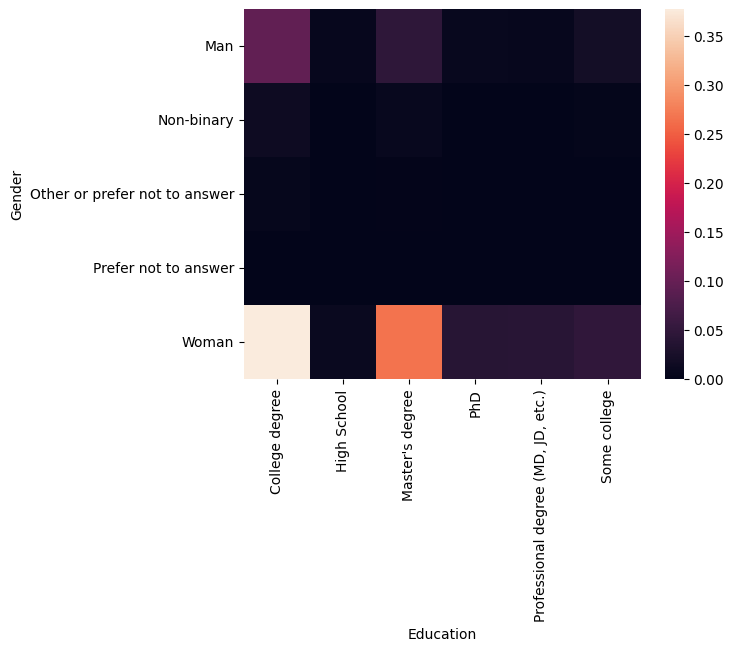

In [33]:
joint = pd.crosstab(salaries_df["Gender"], salaries_df["Education"], normalize=True)

sns.heatmap(joint)

The cross-tabulations and heatmap above provide information on the relationship between gender and education. Notably, college degrees and master's degrees emerge as the two most common education types across both men and women. However, it is essential to acknowledge that the analysis may be skewed due to a higher number of responses from women compared to men.

In [34]:
# Displays first dataframe after preliminary EDA
salaries_df

Timestamp    Age                       Industry  \
0      4/27/2021 11:02:10  25-34   Education (Higher Education)   
1      4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
2      4/27/2021 11:02:41  25-34                     Nonprofits   
3      4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   
4      4/27/2021 11:02:46  25-34   Education (Higher Education)   
...                   ...    ...                            ...   
22547   2/2/2023 14:22:11  18-24              Computing or Tech   
22548   2/5/2023 23:44:57  18-24   Education (Higher Education)   
22549  2/16/2023 19:14:37  25-34              Computing or Tech   
22550  2/16/2023 20:11:48  25-34   Engineering or Manufacturing   
22551  2/21/2023 13:54:14  35-44    Marketing, Advertising & PR   

                                Job Title  \
0      Research and Instruction Librarian   
1                    Marketing Specialist   
2                         Program Manager   
3                      Accounting Manager   
4          Scholarly Publishing Librarian   
...                                   ...   
22547                     DevOps Engineer   
22548                               tutor   
22549                         It manager    
22550                   Senior Engineer I   
22551               Group Copy Supervisor   

                            Additional Job Title Context  Annual Salary  \
0                                                    NaN      55000.000   
1                                                    NaN      34000.000   
2                                                    NaN      62000.000   
3                                                    NaN      60000.000   
4                                                    NaN      62000.000   
...                                                  ...            ...   
22547                                                NaN      90000.000   
22548  I hold several different jobs throughout the y...      27040.000   
22549                                                NaN      55000.000   
22550                 Automotive mechanical engineering       87000.000   
22551                                                NaN     150000.000   

       Additional Compensation Currency Other Currency Type  \
0                        0.000      USD                 NaN   
1                          NaN      USD                 NaN   
2                     3000.000      USD                 NaN   
3                     7000.000      USD                 NaN   
4                          NaN      USD                 NaN   
...                        ...      ...                 ...   
22547                10000.000      USD                 NaN   
22548                      NaN      USD                 NaN   
22549                      NaN      USD                 NaN   
22550                 7000.000      USD                 NaN   
22551                      NaN      USD                 NaN   

      Additional Income Context         Country      U.S. State  \
0                           NaN   United States   Massachusetts   
1                           NaN              US       Tennessee   
2                           NaN             USA       Wisconsin   
3                           NaN              US  South Carolina   
4                           NaN             USA   New Hampshire   
...                         ...             ...             ...   
22547                       NaN   United States      New Jersey   
22548                       NaN              US    Rhode Island   
22549                       NaN  United States             Ohio   
22550                       NaN  United States         New York   
22551                       NaN              US        New York   

                City Professional Experience Overall  \
0             Boston                       5-7 years   
1        Chattanooga                     2 - 4 years   
2          Milwaukee                   

As with the first dataset, this dataset is strong enough to use for our investigation.

**Main Exploratory Analysis & Data Visualization (EDA):**

Now that the investigation has been introduced and both datasets have been discussed, cleaned, and confirmed as satisfactory for our further analysis, we will perform more EDA to find an answer to our first question, which is "How do the qualities of a job position affect listed salary?" The first dataset about LinkedIn job postings will be our subject of analysis for this question because this dataset has information about jobs and these jobs' listed salaries before any person is attached to the job, as each row is a posting looking to be filled, and therefore salary numbers are arrived at soley by the qualities of the jobs themselves. The job characteristics we will analyze are job title, job location, and work experience level.

<Axes: title={'center': 'Count by Job Title'}, xlabel='Job Title', ylabel='Count'>

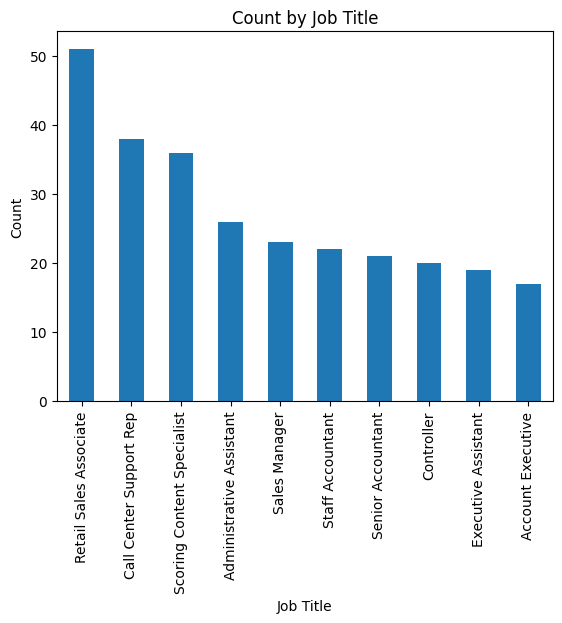

In [35]:
# Count the number of occurrences of each unique job title in the 'title' column, select the highest ten and create a bar graph
job_postings_df["title"].value_counts()[[1,2,3,4,6,7,8,9,10,12]].plot.bar(ylabel="Count", xlabel="Job Title", title="Count by Job Title")

<Axes: title={'center': 'Average Salary by Job Title'}, xlabel='Job Title', ylabel='Average Salary'>

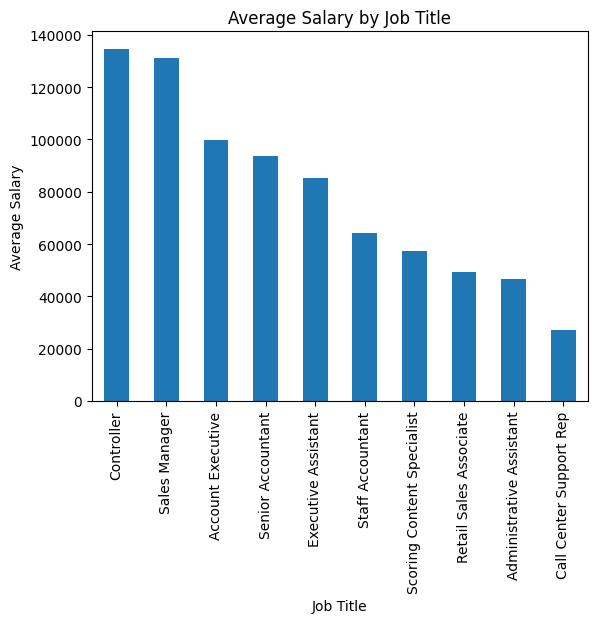

In [36]:
filter2 = ((job_postings_df["title"] == "Account Executive") | (job_postings_df["title"] == "Retail Sales Associate") | (job_postings_df["title"] == "Call Center Support Rep") |
          (job_postings_df["title"] == "Scoring Content Specialist") | (job_postings_df["title"] == "Administrative Assistant") | (job_postings_df["title"] == "Sales Manager") |
          (job_postings_df["title"] == "Staff Accountant") | (job_postings_df["title"] == "Senior Accountant") | (job_postings_df["title"] == "Controller") |
          (job_postings_df["title"] == "Executive Assistant"))

job_postings_df[filter2].groupby("title")["avg_salary"].mean().sort_values(ascending=False).plot.bar(ylabel="Average Salary", xlabel="Job Title", title="Average Salary by Job Title")

We found the ten most common job titles in the dataset in the first bar graph above. These titles can be viewed as the label for each individual bar in the graph. The second bar graph provides the mean average salary for each of these ten most common job titles. The order of the ten most common titles does not reflect the order of the highest mean average salaries among the titles. "Retail Sales Associate" is the most common job title but has only the eigth highest mean average salary. The "Controller" job title has the highest mean average salary, reaching into the  130,000 USD range. The mean average salary of "Sales Manager", the next closest job title, is not far behind, just eclipsing 130,000 USD as well. None of the other eight jobs have a mean average salary that reaches 100,000 USD.

<Axes: title={'center': 'Count by U.S. City'}, xlabel='City', ylabel='Count'>

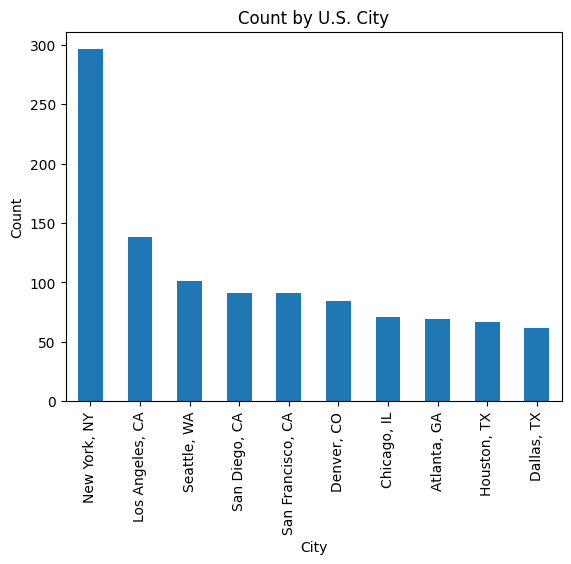

In [37]:
# Count the number of occurrences of each unique location in the 'location' column, select the highest ten and create a bar graph
job_postings_df["location"].value_counts()[[1,2,3,4,5,7,8,9,10,11]].plot.bar(ylabel="Count", xlabel="City", title="Count by U.S. City")

<Axes: title={'center': 'Average Salary by U.S. City'}, xlabel='City', ylabel='Average Salary'>

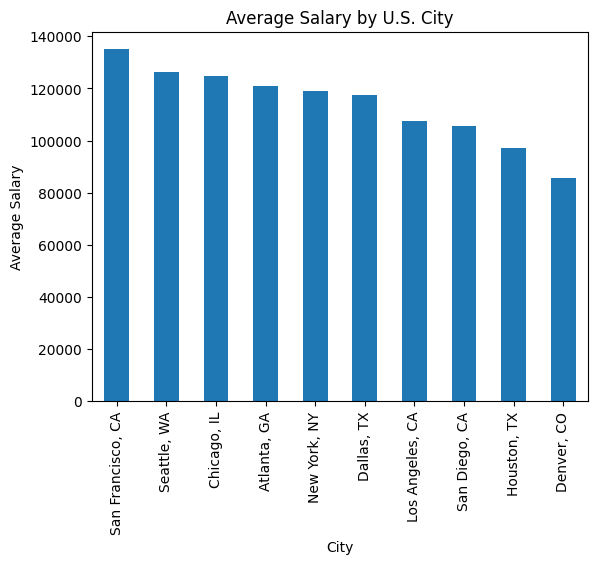

In [38]:
# Create a boolean filter for specific locations
filter1 = ((job_postings_df["location"] == "New York, NY") | (job_postings_df["location"] == "Los Angeles, CA") | (job_postings_df["location"] == "Seattle, WA") |
          (job_postings_df["location"] == "San Diego, CA") | (job_postings_df["location"] == "San Francisco, CA") | (job_postings_df["location"] == "Denver, CO") |
          (job_postings_df["location"] == "Chicago, IL") | (job_postings_df["location"] == "Atlanta, GA") | (job_postings_df["location"] == "Houston, TX") |
          (job_postings_df["location"] == "Dallas, TX"))

# Filter the DataFrame based on the specified locations and calculate the mean of 'avg_salary' for each location, then sort the average salaries in descending order and plot a bar chart
job_postings_df[filter1].groupby("location")["avg_salary"].mean().sort_values(ascending=False).plot.bar(ylabel="Average Salary", xlabel="City", title="Average Salary by U.S. City")


The same analysis was done on job location. New York City, NY is by far the most common job location in the dataset but has the fifth highest mean average salary. San Francisco, CA has the highest mean average salary with a figure not far below 140,000 USD. The mean average salary declines at a mostly steady rate as we move to the right in the bar graph. Denver, CO has the tenth highest mean average salary of the group with a number around $90,000.

<Axes: title={'center': 'Average Salary by U.S. State'}, xlabel='State', ylabel='Average Salary'>

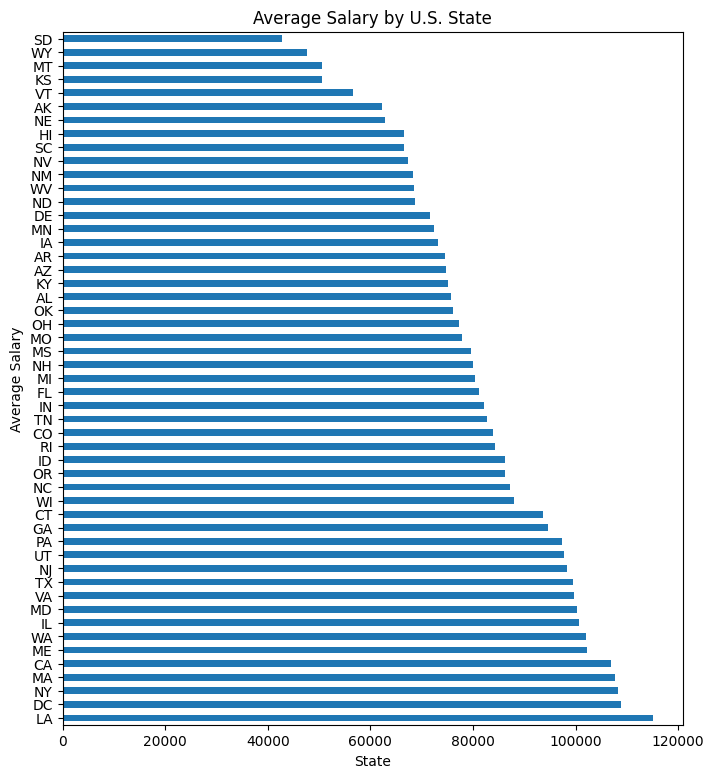

In [39]:
# Extract the state code from the 'location' column and create a new 'state' column
job_postings_df["state"] = job_postings_df["location"].str[-2:]

# Keep only the valid state codes in the 'state' column
job_postings_df["state"] = job_postings_df["state"].where(job_postings_df["state"].isin(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "DC", "FL", "GA", "HI",
                                                                                         "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "VI", "WA", "WV", "WI", "WY"]))
# Group by state and calculate the mean of 'avg_salary' for each state, then plot horizontal bar chart
job_postings_df.groupby("state")["avg_salary"].mean().sort_values(ascending=False).plot.barh(ylabel="Average Salary", xlabel="State", figsize=(8,9), title="Average Salary by U.S. State")

Louisiana, as seen from the above, has the highest average salary by US State, which does not seem normal. Let's take a look at the descriptive summary statistics to see if any outliers exist.

In [40]:
state_code = 'LA'
louisiana_data = job_postings_df[job_postings_df["state"] == state_code]
print("Summary statistics for Louisiana:")
print(louisiana_data["avg_salary"].describe())


Summary statistics for Louisiana:
count       20.000
mean    115095.500
std     111072.655
min      22880.000
25%      48882.000
50%      85870.000
75%     108125.000
max     362500.000
Name: avg_salary, dtype: float64


When looking at the summary statistic, there appears to be a maximum salary of 362,500 USD, which is much higher compared to the median and 75th quartile.

In [41]:
state_code = 'LA'
louisiana_data = job_postings_df[job_postings_df["state"] == state_code]
sorted_louisiana_data = louisiana_data.sort_values(by='avg_salary', ascending=False)
highest_salaries_in_louisiana = sorted_louisiana_data[['title', 'avg_salary']].head(10).values.tolist()
for title, salary in highest_salaries_in_louisiana:
    print(f"{title}: ${salary:,.2f}")


Branch Leader: $362,500.00
Branch Leader: $362,500.00
Branch Leader: $362,500.00
Industrial Construction Superintendents: $130,000.00
Project Engineer: $117,500.00
Associate Attorney (New Orleans): $105,000.00
Business Development Manager: $105,000.00
Program Manager 3--DHH(Clinical Systems and Services Team Lead): $104,112.00
Pipeline Construction Supervisor: $90,000.00
Auto Body Technician: $87,500.00


We check to see the 10 highest salaries in Louisiana, to see if there are any other outliers that are close to the max value of 362,500 USD. As we can see, there are three of the same occupations (branch leader) that all have the same value of 362,500 USD. It is safe to say that these are all outliers, so we remove them and rerun the summary statistics and bar chart.

In [42]:
state_code = 'LA'
louisiana_data = job_postings_df[job_postings_df["state"] == state_code]
sorted_louisiana_data = louisiana_data.sort_values(by='avg_salary', ascending=False)
trimmed_louisiana_data = sorted_louisiana_data.iloc[3:]
highest_salaries_in_louisiana = trimmed_louisiana_data[['title', 'avg_salary']].head(10).values.tolist()
for title, salary in highest_salaries_in_louisiana:
    print(f"{title}: ${salary:,.2f}")


Industrial Construction Superintendents: $130,000.00
Project Engineer: $117,500.00
Associate Attorney (New Orleans): $105,000.00
Business Development Manager: $105,000.00
Program Manager 3--DHH(Clinical Systems and Services Team Lead): $104,112.00
Pipeline Construction Supervisor: $90,000.00
Auto Body Technician: $87,500.00
Cleared Senior Information Technology Specialist: $84,240.00
MEDICAID ANALYST SUPERVISOR: $67,476.00
PC Technician: $50,960.00


In [43]:
# Calculate summary statistics for the 'avg_salary' column in the modified Louisiana data
summary_statistics_louisiana = trimmed_louisiana_data["avg_salary"].describe()
print(summary_statistics_louisiana)


count       17.000
mean     71435.882
std      33887.537
min      22880.000
25%      47136.000
50%      67476.000
75%     104112.000
max     130000.000
Name: avg_salary, dtype: float64


From the summary statistic, the mean now appears to be closer to the middle of the pack of other states and what one would expect knowing generally about Louisiana's economy.

<Axes: title={'center': 'Average Salary by U.S. State (Louisiana - Top 3 Removed)'}, xlabel='State', ylabel='Average Salary'>

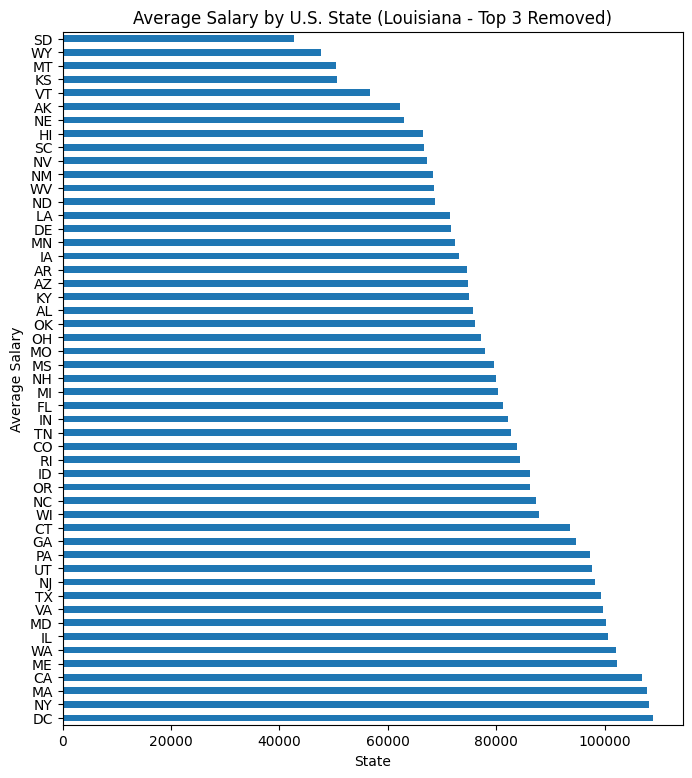

In [44]:
state_code = 'LA'

# Create a copy of the original DataFrame
job_postings_copy = job_postings_df.copy()

# Filter the DataFrame for records related to Louisiana
louisiana_data = job_postings_copy[job_postings_copy["state"] == state_code]

# Sort the Louisiana data by 'avg_salary' in descending order
sorted_louisiana_data = louisiana_data.sort_values(by='avg_salary', ascending=False)

# Remove the top 3 entries
trimmed_louisiana_data = sorted_louisiana_data.iloc[3:]

# Update the salaries for Louisiana with the trimmed data
job_postings_copy.loc[job_postings_copy["state"] == state_code, "avg_salary"] = trimmed_louisiana_data["avg_salary"]

# Group by state and calculate the mean of 'avg_salary' for each state
average_salary_by_state = job_postings_copy.groupby("state")["avg_salary"].mean()

# Sort the average salaries in descending order and plot horizontal bar chart
average_salary_by_state.sort_values(ascending=False).plot.barh(ylabel="Average Salary", xlabel="State", figsize=(8, 9), title="Average Salary by U.S. State (Louisiana - Top 3 Removed)")


The new graph with the adjusted Louisiana data now has Louisiana in a more logical place and no where near the state with the highest mean average salary. The state with the highest mean average salary is actually not a state at all. The District of Columbia has the highest mean average salary of around 110,000 USD. The state with the second highest mean average salary is New York with a figure a little bit below the District of Columbia's. New York ranking so high is not surprising. The three states with the lowest mean average salaries are Montana, Wyoming, and South Dakota, in descending order. These states have low relative populations and economies focused primarily on agriculture so these states' rank could be expected.

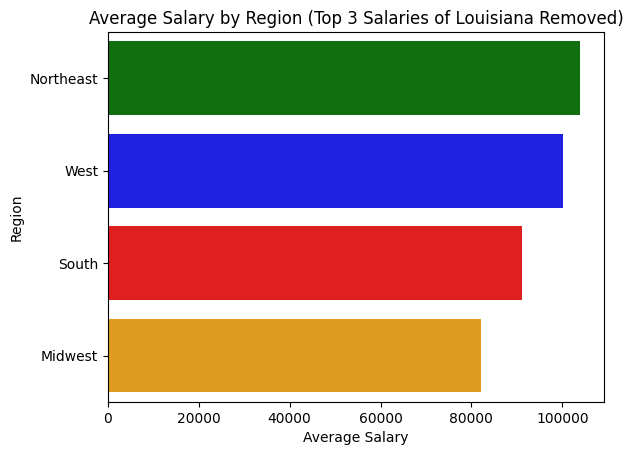

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the state code from the 'location' column and create a new 'state' column
job_postings_df["state"] = job_postings_df["location"].str[-2:].copy()

# Define a dictionary mapping each state to its region
state_to_region = {
    "AL": "South", "AK": "West", "AZ": "West", "AR": "South", "CA": "West", "CO": "West", "CT": "Northeast",
    "DE": "South", "DC": "South", "FL": "South", "GA": "South", "HI": "West", "ID": "West", "IL": "Midwest",
    "IN": "Midwest", "IA": "Midwest", "KS": "Midwest", "KY": "South", "LA": "South", "ME": "Northeast",
    "MD": "South", "MA": "Northeast", "MI": "Midwest", "MN": "Midwest", "MS": "South", "MO": "Midwest",
    "MT": "West", "NE": "Midwest", "NV": "West", "NH": "Northeast", "NJ": "Northeast", "NM": "West",
    "NY": "Northeast", "NC": "South", "ND": "Midwest", "OH": "Midwest", "OK": "South", "OR": "West",
    "PA": "Northeast", "RI": "Northeast", "SC": "South", "SD": "Midwest", "TN": "South", "TX": "South",
    "UT": "West", "VT": "Northeast", "VA": "South", "VI": "South", "WA": "West", "WV": "South",
    "WI": "Midwest", "WY": "West"
}

# Create a new 'region' column based on the mapping
job_postings_df["region"] = job_postings_df["state"].map(state_to_region).copy()

# Keep only the valid state codes in the 'state' column
job_postings_df = job_postings_df[job_postings_df["state"].isin(state_to_region.keys())].copy()

# Exclude the top three salaries for Louisiana
louisiana_salaries = job_postings_df[job_postings_df["state"] == "LA"]["avg_salary"]
top_louisiana_salaries = louisiana_salaries.nlargest(3)
job_postings_df.loc[(job_postings_df["state"] == "LA") & (job_postings_df["avg_salary"].isin(top_louisiana_salaries.index)), "avg_salary"] = louisiana_salaries[~louisiana_salaries.isin(top_louisiana_salaries)].mean()

# Group by region and calculate the mean of 'avg_salary' for each region
region_avg_salary = job_postings_df.groupby("region")["avg_salary"].mean().sort_values(ascending=False)

# Define a color palette for each region
region_colors = {"West": "blue", "Northeast": "green", "Midwest": "orange", "South": "red"}

sns.barplot(x=region_avg_salary, y=region_avg_salary.index, palette=region_colors)

plt.xlabel("Average Salary")
plt.ylabel("Region")
plt.title("Average Salary by Region (Top 3 Salaries of Louisiana Removed)")
plt.show()


Unsurprisingly, the Northeast has the highest mean average salary around 110,000 USD. This region has some of the densest and most established cities including New York City, Boston, Philadelphia, and Pittsburgh, with New Yotk City appearing the most in the dataset. This region also has areas with some of the highest costs of living in the country. As a result, the Northeast being the leader is somewhat expected. The West being second with a mean average salary around 100,000 USD is also not unusual. The West is home to famously wealthy technology hubs including the San Francisco metropolitan area. This region also has the second largest city in the country and some of the highest cost of living in the form of Los Angeles and its surrounding area. Other cities in the West like Seattle and San Diego are in the top ten common cities graphs discussed earlier. The South being third and Midwest being fourth makes sense. Outside of Chicago, the Midwest has few locations that can compete with those in the Northeast, West, and states in the South like Texas and Florida in terms of economy and cost of living.

<Axes: title={'center': 'Count by Work Experience Level'}, xlabel='Work Experience Level', ylabel='Count'>

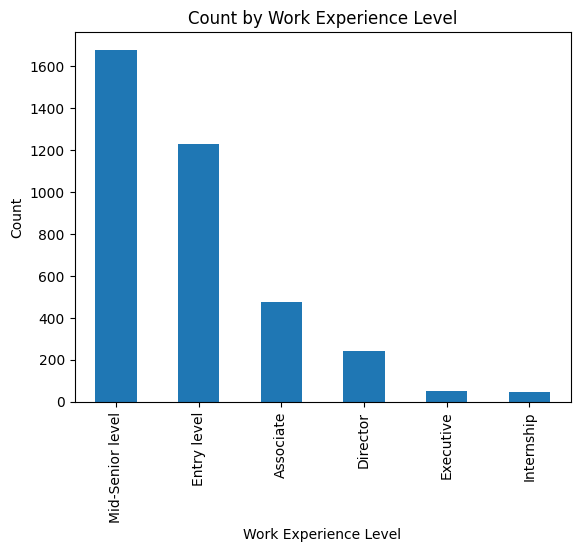

In [46]:
job_postings_df["formatted_experience_level"].value_counts().plot.bar(ylabel="Count", xlabel="Work Experience Level", title="Count by Work Experience Level")

<Axes: title={'center': 'Average Salary by Work Expereince Level'}, xlabel='Work Experience Level', ylabel='Average Salary'>

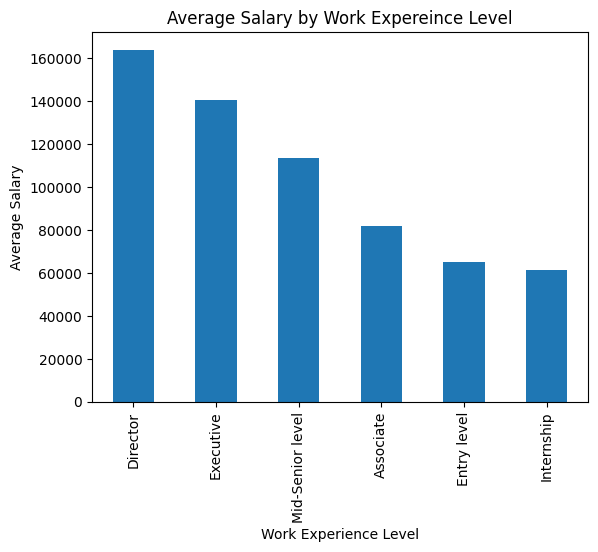

In [47]:
job_postings_df.groupby("formatted_experience_level")["avg_salary"].mean().sort_values(ascending=False).plot.bar(ylabel="Average Salary", xlabel="Work Experience Level", title="Average Salary by Work Expereince Level")

Only six work experience levels exist in the dataset so all of them are included in the two bar graphs above. The mid-senior level showed up the most with over 1,600 occurrences and the Internship level showed up the least with around 50 occurrences in the dataset. The Director level has the highest mean average salary, with a value over 160,000 USD, and the order of each experience level with the next largest mean average salary matches expectations regarding prestige, as the Internship level has the lowest mean average salary, with a value around 60,000 USD.

Certain job titles, job locations, and work experience levels definitely influence listed salary. Based on the analysis, an answer to "How do the qualities of a job position affect listed salary?" can be best stated as what job qualities maximize or minimize salary. To get common jobs with the highest listed salaries, one should look for a "Controller" position, a job in accounting, a high level sales position, or an assistant role. The "Controller" job title has the highest mean average salary among the most common jobs in the dataset. The accounting roles with the titles of "Senior Accountant" and "Staff Accountant", sales roles with the titles of "Sales Manager" and "Retail Sales Associate", and assistant roles with the titles of "Executive Assistant" and "Administrative Asssistant" are also present among the top ten common job titles and their salaries. One should also choose a position in the Northeast region, more specifically in states such as New York, Massachusetts, Maine, New Jersey, and Pennsylvania. The most common city with the highest mean average salary in the Northeast region is New York City. The West region is not a bad second option with cities like San Francisco, Seattle, Los Angeles, San Diego, and Denver performing well in highest mean average salary among the ten most common cities in the dataset. In terms of work experience level, a job at the Director level helps maximize salary. The mean average salary for work experience levels descreases as one moves down the hierarchy. To minimize salary, one should do the opposite. Instead of a position with a "Controller" job title that is at the Director level and is located in New York, another location in the Northeast region, or a major city in the West region, one should pick a job at the internship level in the Midwestern region in states like South Dakota, Wyoming, Montana, Kansas, or Nebraska. In short, job title, job location, and work experience level all affect listed salary, but some values in each of these categories affect listed salary greater than others and in a positive or negative direction. Being able to maximize listed salary for a new job opportunity is about understanding which options for each of these qualities are available and choosing the best combination to optimize listed salary.

**Machine Learning Model Analysis:**

We will now set up and introduce our machine learning model into our investigation. We have chosen to use a K-Nearest Neighbors regression model. The feature inputs we will for our model are job title, job location, and work experience level. The first dataset on LinkedIn job postings will serve as the training data, and the second dataset on survery responses will serve as the test data. We have chosen these features because they offer the most overlap in variables columns between the two datasets. This decision also informed which variables to consider in our EDA in the previous section. The model will work by creating a salary prediction for each observation in the second dataset by taking an average of the salaries for the K-nearest observations in the first dataset. These K-nearest neighbors will be found by calculating differences between the values of the selected feature columns. The predictions will be based on only the qualities of the jobs themselves. Once the model is complete, as described in the introduction, the predicted salaries will be compared to the actual salaries of every individual behind the survey responses in the second datset. We will leverage each individual's demographic information along with these comparisons to work toward an answer to our second question, "How does demographic information impact actual salary?" We will now do the necessary preparation for the model.

In [48]:
job_postings_df["formatted_experience_level"].value_counts()

Mid-Senior level    1678
Entry level         1229
Associate            477
Director             240
Executive             51
Internship            46
Name: formatted_experience_level, dtype: int64

In [49]:
salaries_df["Professional Experience In Field"].value_counts()

11 - 20 years       5329
5-7 years           5283
2 - 4 years         4860
8 - 10 years        4071
21 - 30 years       1534
1 year or less      1119
31 - 40 years        324
41 years or more      32
Name: Professional Experience In Field, dtype: int64

All the feature columns must match between the training data and test data for the model to work. The first feature we will compatible is work experience level. The values for this feature in the first dataset are those we saw in the EDA of the previous section. However, the values for this feature in the second dataset are in the format of experience years rather than an experience level label.

In [50]:
salaries_df["Mapped Experience (In Field)"] = salaries_df["Professional Experience In Field"].map({"1 year or less": "Internship", "2 - 4 years": "Entry level", "5-7 years": "Associate", "8 - 10 years": "Mid-Senior level", "11 - 20 years": "Director", "21 - 30 years": "Director", "31 - 40 years": "Executive", "41 years or more": "Executive"}).copy()

To solve this issue, we have mapped each value in the "Professional Experience In Field" column of the second dataset to one of the experience level labels from the "formatted_experience_level" column of the first datset. Our choice of which values from the second dataset to map to each value from the first dataset is subjective but reasonable. These mapped values are now stored in the "Mapped Experience (In Field)" column of the second dataset.

In [51]:
import pandas as pd

# Create a dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'District of Columbia': 'DC', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Create a new column for state abbreviations
salaries_df['State Abbreviation'] = salaries_df['U.S. State'].map(state_abbr)

# Create a new column for location in the format 'city, state abbreviation'
salaries_df['Location'] = salaries_df['City'] + ', ' + salaries_df['State Abbreviation']

salaries_df


Timestamp    Age                       Industry  \
0      4/27/2021 11:02:10  25-34   Education (Higher Education)   
1      4/27/2021 11:02:38  25-34  Accounting, Banking & Finance   
2      4/27/2021 11:02:41  25-34                     Nonprofits   
3      4/27/2021 11:02:42  25-34  Accounting, Banking & Finance   
4      4/27/2021 11:02:46  25-34   Education (Higher Education)   
...                   ...    ...                            ...   
22547   2/2/2023 14:22:11  18-24              Computing or Tech   
22548   2/5/2023 23:44:57  18-24   Education (Higher Education)   
22549  2/16/2023 19:14:37  25-34              Computing or Tech   
22550  2/16/2023 20:11:48  25-34   Engineering or Manufacturing   
22551  2/21/2023 13:54:14  35-44    Marketing, Advertising & PR   

                                Job Title  \
0      Research and Instruction Librarian   
1                    Marketing Specialist   
2                         Program Manager   
3                      Accounting Manager   
4          Scholarly Publishing Librarian   
...                                   ...   
22547                     DevOps Engineer   
22548                               tutor   
22549                         It manager    
22550                   Senior Engineer I   
22551               Group Copy Supervisor   

                            Additional Job Title Context  Annual Salary  \
0                                                    NaN      55000.000   
1                                                    NaN      34000.000   
2                                                    NaN      62000.000   
3                                                    NaN      60000.000   
4                                                    NaN      62000.000   
...                                                  ...            ...   
22547                                                NaN      90000.000   
22548  I hold several different jobs throughout the y...      27040.000   
22549                                                NaN      55000.000   
22550                 Automotive mechanical engineering       87000.000   
22551                                                NaN     150000.000   

       Additional Compensation Currency Other Currency Type  \
0                        0.000      USD                 NaN   
1                          NaN      USD                 NaN   
2                     3000.000      USD                 NaN   
3                     7000.000      USD                 NaN   
4                          NaN      USD                 NaN   
...                        ...      ...                 ...   
22547                10000.000      USD                 NaN   
22548                      NaN      USD                 NaN   
22549                      NaN      USD                 NaN   
22550                 7000.000      USD                 NaN   
22551                      NaN      USD                 NaN   

      Additional Income Context         Country      U.S. State  \
0                           NaN   United States   Massachusetts   
1                           NaN              US       Tennessee   
2                           NaN             USA       Wisconsin   
3                           NaN              US  South Carolina   
4                           NaN             USA   New Hampshire   
...                         ...             ...             ...   
22547                       NaN   United States      New Jersey   
22548                       NaN              US    Rhode Island   
22549                       NaN  United States             Ohio   
22550                       NaN  United States         New York   
22551                       NaN              US        New York   

                City Professional Experience Overall  \
0             Boston                       5-7 years   
1        Chattanooga                     2 - 4 years   
2          Milwaukee                   

The job location values the first dataset are stored in one column that has both city and state separated by a comma and a space. However, the second dataset has a separate column for both city and state. The state column also has the state names spelled out instead of in abbreviation form like the first dataset. We have created two new columns in the second dataset. One has all the state names mapped to their abbreviations, and the other has the cities combined with the these state abbreviations in the format of the first dataset.

In [52]:
job_postings_df.isnull().sum()

job_id                           0
company_id                       0
title                            0
description                      0
max_salary                     887
med_salary                    4469
min_salary                     887
pay_period                       0
formatted_work_type              0
location                         0
applies                       2254
original_listed_time             0
remote_allowed                   0
views                          834
job_posting_url                  0
application_url               1974
application_type                 0
expiry                           0
closed_time                   5141
formatted_experience_level    1635
skills_desc                   5299
listed_time                      0
posting_domain                2242
sponsored                        0
work_type                        0
currency                         0
compensation_type                0
avg_salary                     887
med_salary_log      

In [53]:
salaries_df.isnull().sum()

Timestamp                               0
Age                                     0
Industry                               55
Job Title                               0
Additional Job Title Context        16603
Annual Salary                           0
Additional Compensation              5578
Currency                                0
Other Currency Type                 22528
Additional Income Context           20089
Country                                 0
U.S. State                              0
City                                    0
Professional Experience Overall         0
Professional Experience In Field        0
Education                               0
Gender                                  0
Race                                    0
Mapped Experience (In Field)            0
State Abbreviation                    105
Location                              105
dtype: int64

In [54]:
# Drop rows with NaNs in "formatted_experience_level" and "avg_salary"
job_postings_df.dropna(subset=["formatted_experience_level", "avg_salary"], inplace=True)
salaries_df.dropna(subset=["Location"], inplace=True)

We drop any last null values that will prevent the model from working.

In [55]:
# Makes all the characters in the job titles of both datasets lowercase
job_postings_df['title'] = job_postings_df['title'].str.lower()
salaries_df['Job Title'] = salaries_df['Job Title'].str.lower()

We make the job titles in both datasets completely lowercase to elminate one barrier of comparison between them.

In [56]:
job_postings_df.reset_index(inplace=True)

We need to reset the index because we will be concatenating soon.

In [57]:
necessary_columns = job_postings_df[["title", "avg_salary", "location", "formatted_experience_level"]]
necessary_columns

title  avg_salary  \
0     lead solar maintenance roofer, residential ser...   67600.000   
1                            mental health professional   67410.500   
2                            mental health professional   67410.500   
3                  clinic managers - physical therapist  104260.650   
4                                  territory associate    47500.000   
...                                                 ...         ...   
3112  equipment maintenance technician- automotive p...   52000.000   
3113                                     senior analyst   80000.000   
3114                                      design intern   44688.800   
3115         sr. bilingual copywriter (canadian french)   98550.000   
3116                                        mri manager  122500.000   

             location formatted_experience_level  
0       San Diego, CA           Mid-Senior level  
1         Spokane, WA                Entry level  
2         Spokane, WA                Entry level  
3        Puyallup, WA           Mid-Senior level  
4     San Gabriel, CA                Entry level  
...               ...                        ...  
3112       Dayton, OH           Mid-Senior level  
3113     New York, NY           Mid-Senior level  
3114      Miramar, FL           Mid-Senior level  
3115     Torrance, CA           Mid-Senior level  
3116     New York, NY           Mid-Senior level  

[3117 rows x 4 columns]

One problem with the compatibility between the two datasets is that few of the full job titles match. To address this issue, we will make each word in the job titles of the datasets into their own binary feature columns that will be inputed into the model. This way all the job title data can be used. We take only the necessary columns from the first dataframe so we can implement the method of each word as a separate feature and input these columns as features into the model.

In [58]:
titles = list(necessary_columns["title"])

We put every job title from the first dataset into a list.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(titles)

title_words_binary = pd.DataFrame(vectorizer.transform(titles).toarray())
title_words_binary.columns = vectorizer.get_feature_names_out()
title_words_binary

00  000  00am  00pm  02161  02237  02252  04  05041  10  100  100k  \
0      0    0     0     0      0      0      0   0      0   0    0     0   
1      0    0     0     0      0      0      0   0      0   0    0     0   
2      0    0     0     0      0      0      0   0      0   0    0     0   
3      0    0     0     0      0      0      0   0      0   0    0     0   
4      0    0     0     0      0      0      0   0      0   0    0     0   
...   ..  ...   ...   ...    ...    ...    ...  ..    ...  ..  ...   ...   
3112   0    0     0     0      0      0      0   0      0   0    0     0   
3113   0    0     0     0      0      0      0   0      0   0    0     0   
3114   0    0     0     0      0      0      0   0      0   0    0     0   
3115   0    0     0     0      0      0      0   0      0   0    0     0   
3116   0    0     0     0      0      0      0   0      0   0    0     0   

      101955  10627  1066113  1066795  10713  10am  10pm  110  116  119  12  \
0          0      0        0        0      0     0     0    0    0    0   0   
1          0      0        0        0      0     0     0    0    0    0   0   
2          0      0        0        0      0     0     0    0    0    0   0   
3          0      0        0        0      0     0     0    0    0    0   0   
4          0      0        0        0      0     0     0    0    0    0   0   
...      ...    ...      ...      ...    ...   ...   ...  ...  ...  ...  ..   
3112       0      0        0        0      0     0     0    0    0    0   0   
3113       0      0        0        0      0     0     0    0    0    0   0   
3114       0      0        0        0      0     0     0    0    0    0   0   
3115       0      0        0        0      0     0     0    0    0    0   0   
3116       0      0        0        0      0     0     0    0    0    0   0   

      1203  125k  126042  129  130k  13212  15  151  155k  1600  18  19  1b  \
0        0     0       0    0     0      0   0    0     0     0   0   0   0   
1        0     0       0    0     0      0   0    0     0     0   0   0   0   
2        0     0       0    0     0      0   0    0     0     0   0   0   0   
3        0     0       0    0     0      0   0    0     0     0   0   0   0   
4        0     0       0    0     0      0   0    0     0     0   0   0   0   
...    ...   ...     ...  ...   ...    ...  ..  ...   ...   ...  ..  ..  ..   
3112     0     0       0    0     0      0   0    0     0     0   0   0   0   
3113     0     0       0    0     0      0   0    0     0     0   0   0   0   
3114     0     0       0    0     0      0   0    0     0     0   0   0   0   
3115     0     0       0    0     0      0   0    0     0     0   0   0   0   
3116     0     0       0    0     0      0   0    0     0     0   0   0   0   

      1pm  1st  20  2000  20026446  2023  2024  209453  210345  210672  22  \
0       0    0   0     0         0     0     0       0       0       0   0   
1       0    0   0     0         0     0     0       0       0       0   0   
2       0    0   0     0         0     0     0       0       0       0   0   
3       0    0   0     0         0     0     0       0       0       0   0   
4       0    0   0     0         0     0     0       0       0       0   0   
...   ...  ...  ..   ...       ...   ...   ...     ...     ...     ...  ..   
3112    0    0   0     0         0     0     0       0       0       0   0   
3113    0    0   0     0         0     0     0       0       0       0   0   
3114    0    0   0     0         0     0     0       0       0       0   0   
3115    0    0   0     0         0     0     0       0       0       0   0   
3116    0    0   0     0         0     0     0       0       0       0   0   

      224  23  230  2301  233  236  238752  24  2439699  2451  25  2500  260  \
0       0   0    0     0    0    0       0   0        0     0   0     0    0   
1       0   0    0     0    0    0       0   0        0     0   0     0    0   
2       0   0    0

Next we get a new dataframe where each row corresponds to an observation from the first dataset and each column represents whether the word in the title of the column is present in each observation's job title.

In [60]:
model_input = pd.concat([necessary_columns, title_words_binary], axis=1)
model_input

title  avg_salary  \
0     lead solar maintenance roofer, residential ser...   67600.000   
1                            mental health professional   67410.500   
2                            mental health professional   67410.500   
3                  clinic managers - physical therapist  104260.650   
4                                  territory associate    47500.000   
...                                                 ...         ...   
3112  equipment maintenance technician- automotive p...   52000.000   
3113                                     senior analyst   80000.000   
3114                                      design intern   44688.800   
3115         sr. bilingual copywriter (canadian french)   98550.000   
3116                                        mri manager  122500.000   

             location formatted_experience_level  00  000  00am  00pm  02161  \
0       San Diego, CA           Mid-Senior level   0    0     0     0      0   
1         Spokane, WA                Entry level   0    0     0     0      0   
2         Spokane, WA                Entry level   0    0     0     0      0   
3        Puyallup, WA           Mid-Senior level   0    0     0     0      0   
4     San Gabriel, CA                Entry level   0    0     0     0      0   
...               ...                        ...  ..  ...   ...   ...    ...   
3112       Dayton, OH           Mid-Senior level   0    0     0     0      0   
3113     New York, NY           Mid-Senior level   0    0     0     0      0   
3114      Miramar, FL           Mid-Senior level   0    0     0     0      0   
3115     Torrance, CA           Mid-Senior level   0    0     0     0      0   
3116     New York, NY           Mid-Senior level   0    0     0     0      0   

      02237  02252  04  05041  10  100  100k  101955  10627  1066113  1066795  \
0         0      0   0      0   0    0     0       0      0        0        0   
1         0      0   0      0   0    0     0       0      0        0        0   
2         0      0   0      0   0    0     0       0      0        0        0   
3         0      0   0      0   0    0     0       0      0        0        0   
4         0      0   0      0   0    0     0       0      0        0        0   
...     ...    ...  ..    ...  ..  ...   ...     ...    ...      ...      ...   
3112      0      0   0      0   0    0     0       0      0        0        0   
3113      0      0   0      0   0    0     0       0      0        0        0   
3114      0      0   0      0   0    0     0       0      0        0        0   
3115      0      0   0      0   0    0     0       0      0        0        0   
3116      0      0   0      0   0    0     0       0      0        0        0   

      10713  10am  10pm  110  116  119  12  1203  125k  126042  129  130k  \
0         0     0     0    0    0    0   0     0     0       0    0     0   
1         0     0     0    0    0    0   0     0     0       0    0     0   
2         0     0     0    0    0    0   0     0     0       0    0     0   
3         0     0     0    0    0    0   0     0     0       0    0     0   
4         0     0     0    0    0    0   0     0     0       0    0     0   
...     ...   ...   ...  ...  ...  ...  ..   ...   ...     ...  ...   ...   
3112      0     0     0    0    0    0   0     0     0       0    0     0   
3113      0     0     0    0    0    0   0     0     0       0    0     0   
3114      0     0     0    0    0    0   0     0     0       0    0     0   
3115      0     0     0    0    0    0   0     0     0       0    0     0   
3116      0     0     0    0    0    0   0     0     0       0    0     0   

      13212  15  151  155k  1600  18  19  1b  1pm  1st  20  2000  20026446  \
0         0   0    0     0     0   0   0   0    0    0   0     0         0   
1         0   0    0     0     0   0   0   0    0    0   0     0         0   
2         0   0    0     0     0   0   0   0    0    0   0     0         0   
3         0   0    0     0

We then horizontally concatenate this new dataframe with the necessary columns from the first dataset so we have all of our features in one dataframe.

In [61]:
salaries_df["location"] = salaries_df["Location"].copy()
salaries_df["formatted_experience_level"] = salaries_df["Mapped Experience (In Field)"].copy()
salaries_df["title"] = salaries_df["Job Title"].copy()

We make a new set of columns in the second dataset that have the same column titles as the features from the first datset.

In [62]:
salaries_df.reset_index(inplace=True)

In [63]:
necessary_columns_2 = salaries_df[["title", "location", "formatted_experience_level"]]
necessary_columns_2

title           location  \
0      research and instruction librarian         Boston, MA   
1                    marketing specialist    Chattanooga, TN   
2                         program manager      Milwaukee, WI   
3                      accounting manager     Greenville, SC   
4          scholarly publishing librarian        Hanover, NH   
...                                   ...                ...   
22442                     devops engineer    Jersey CIty, NJ   
22443                               tutor        bristol, RI   
22444                         it manager      Cincinnati, OH   
22445                   senior engineer i         Ithaca, NY   
22446               group copy supervisor  New York City, NY   

      formatted_experience_level  
0                      Associate  
1                    Entry level  
2                      Associate  
3                      Associate  
4                    Entry level  
...                          ...  
22442                Entry level  
22443                Entry level  
22444                Entry level  
22445                  Associate  
22446           Mid-Senior level  

[22447 rows x 3 columns]

In [64]:
titles_2 = list(necessary_columns_2["title"])

In [65]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(titles_2)

title_words_binary_2 = pd.DataFrame(vectorizer.transform(titles_2).toarray())
title_words_binary_2.columns = vectorizer.get_feature_names_out()
title_words_binary_2

11  12  19  1a  1st  1x1  24  2d  2nd  3d  3rd  4th  5th  6th  7th  \
0       0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
1       0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
2       0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
3       0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
4       0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
...    ..  ..  ..  ..  ...  ...  ..  ..  ...  ..  ...  ...  ...  ...  ...   
22442   0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
22443   0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
22444   0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
22445   0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   
22446   0   0   0   0    0    0   0   0    0   0    0    0    0    0    0   

       911  aba  able  abroad  absence  abstractor  abuse  academic  \
0        0    0     0       0        0           0      0         0   
1        0    0     0       0        0           0      0         0   
2        0    0     0       0        0           0      0         0   
3        0    0     0       0        0           0      0         0   
4        0    0     0       0        0           0      0         0   
...    ...  ...   ...     ...      ...         ...    ...       ...   
22442    0    0     0       0        0           0      0         0   
22443    0    0     0       0        0           0      0         0   
22444    0    0     0       0        0           0      0         0   
22445    0    0     0       0        0           0      0         0   
22446    0    0     0       0        0           0      0         0   

       academics  academy  acat  access  accessibility  account  accountant  \
0              0        0     0       0              0        0           0   
1              0        0     0       0              0        0           0   
2              0        0     0       0              0        0           0   
3              0        0     0       0              0        0           0   
4              0        0     0       0              0        0           0   
...          ...      ...   ...     ...            ...      ...         ...   
22442          0        0     0       0              0        0           0   
22443          0        0     0       0              0        0           0   
22444          0        0     0       0              0        0           0   
22445          0        0     0       0              0        0           0   
22446          0        0     0       0              0        0           0   

       accounting  accounts  accout  accreditation  acct  acquisition  \
0               0         0       0              0     0            0   
1               0         0       0              0     0            0   
2               0         0       0              0     0            0   
3               1         0       0              0     0            0   
4               0         0       0              0     0            0   
...           ...       ...     ...            ...   ...          ...   
22442           0         0       0              0     0            0   
22443           0         0       0              0     0            0   
22444           0         0       0              0     0            0   
22445           0         0       0              0     0            0   
22446           0         0       0              0     0            0   

       acquisitions  acquistions  act  actions  active  activities  actor  \
0                 0            0    0        0       0           0      0   
1                 0            0    0        0       0           0      0   
2                 0            0    0        0       0           0      0   
3                 0            0    0        0       0           0      0   
4                 

In [66]:
model_input_2 = pd.concat([necessary_columns_2, title_words_binary_2], axis=1)
model_input_2

title           location  \
0      research and instruction librarian         Boston, MA   
1                    marketing specialist    Chattanooga, TN   
2                         program manager      Milwaukee, WI   
3                      accounting manager     Greenville, SC   
4          scholarly publishing librarian        Hanover, NH   
...                                   ...                ...   
22442                     devops engineer    Jersey CIty, NJ   
22443                               tutor        bristol, RI   
22444                         it manager      Cincinnati, OH   
22445                   senior engineer i         Ithaca, NY   
22446               group copy supervisor  New York City, NY   

      formatted_experience_level  11  12  19  1a  1st  1x1  24  2d  2nd  3d  \
0                      Associate   0   0   0   0    0    0   0   0    0   0   
1                    Entry level   0   0   0   0    0    0   0   0    0   0   
2                      Associate   0   0   0   0    0    0   0   0    0   0   
3                      Associate   0   0   0   0    0    0   0   0    0   0   
4                    Entry level   0   0   0   0    0    0   0   0    0   0   
...                          ...  ..  ..  ..  ..  ...  ...  ..  ..  ...  ..   
22442                Entry level   0   0   0   0    0    0   0   0    0   0   
22443                Entry level   0   0   0   0    0    0   0   0    0   0   
22444                Entry level   0   0   0   0    0    0   0   0    0   0   
22445                  Associate   0   0   0   0    0    0   0   0    0   0   
22446           Mid-Senior level   0   0   0   0    0    0   0   0    0   0   

       3rd  4th  5th  6th  7th  911  aba  able  abroad  absence  abstractor  \
0        0    0    0    0    0    0    0     0       0        0           0   
1        0    0    0    0    0    0    0     0       0        0           0   
2        0    0    0    0    0    0    0     0       0        0           0   
3        0    0    0    0    0    0    0     0       0        0           0   
4        0    0    0    0    0    0    0     0       0        0           0   
...    ...  ...  ...  ...  ...  ...  ...   ...     ...      ...         ...   
22442    0    0    0    0    0    0    0     0       0        0           0   
22443    0    0    0    0    0    0    0     0       0        0           0   
22444    0    0    0    0    0    0    0     0       0        0           0   
22445    0    0    0    0    0    0    0     0       0        0           0   
22446    0    0    0    0    0    0    0     0       0        0           0   

       abuse  academic  academics  academy  acat  access  accessibility  \
0          0         0          0        0     0       0              0   
1          0         0          0        0     0       0              0   
2          0         0          0        0     0       0              0   
3          0         0          0        0     0       0              0   
4          0         0          0        0     0       0              0   
...      ...       ...        ...      ...   ...     ...            ...   
22442      0         0          0        0     0       0              0   
22443      0         0          0        0     0       0              0   
22444      0         0          0        0     0       0              0   
22445      0         0          0        0     0       0              0   
22446      0         0          0        0     0       0              0   

       account  accountant  accounting  accounts  accout  accreditation  acct  \
0            0           0           0         0       0              0     0   
1            0           0           0         0       0              0     0   
2            0           0           0         0       0              0     0   
3            0           0           1         0       0              0     0   
4            0           0           0         0       0       

We have done the same process to the second dataset.

In [67]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X_train_dict = model_input.iloc[:, 2:].to_dict(orient="records")
X_test_dict = model_input_2.iloc[:, 1:].to_dict(orient="records")
y_train = model_input["avg_salary"]

# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)
X_test = vec.transform(X_test_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# K-Nearest Neighbors Model
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)



<ipython-input-67-bfea8513a9f7>:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  X_test_dict = model_input_2.iloc[:, 1:].to_dict(orient="records")


As stated before, the necessary columns from the first dataset are inputed into the model as training data and the necessary columns from the second dataset are inputed into the model as test data. The model then performs dummy encoding for all the categorical variables and standardizes the data. Finally, the model makes salary predictions for all the test data from the second dataset.

**Insight & Conclusion:**

In [68]:
pd.DataFrame(y_pred)

0
0      84594.480
1      81903.760
2      94990.000
3      87707.500
4      78020.000
...          ...
22442 113870.000
22443  78020.000
22444  93755.000
22445 124620.000
22446  89856.000

[22447 rows x 1 columns]

We now have salary predictions for every observation in the second dataset.

In [69]:
salaries_df.shape

(22447, 25)

The amount of rows in the second dataframe being the same as the amount of rows in the dataframe with the predictions confirms that there is prediction for all of the second dataset.

In [70]:
salaries_df["Predicted Salary"] = y_pred
salaries_df["Salary Delta"] = (salaries_df["Annual Salary"] - salaries_df["Predicted Salary"]).abs()
salaries_df["Salary Delta"].mean()

35657.02563763533

We put the predicted salaries in their own column of the second dataset and then create another column titled "Salary Delta" that contains the difference between the predicted salary and acutal salary for each individual who gave a survey response. The average of all the values in the Salary Delta column is 35,657.03 USD. Although this number is high, the average is servicable for a regression model using only the words present in the job title, job location, and work experience level as features.

10   35657.026
9    35843.094
11   35845.345
12   35927.718
13   35959.211
8    36131.327
14   36164.220
15   36310.537
7    36716.141
16   36759.526
17   37440.884
6    37729.531
18   37995.385
19   38449.488
20   38848.708
5    39029.222
21   39290.687
22   39522.937
23   39975.685
24   40156.661
25   40405.044
26   40552.819
27   40688.536
4    40818.538
28   40820.853
29   40838.966
30   40954.979
3    42621.922
2    43687.182
1    49780.924
dtype: float64

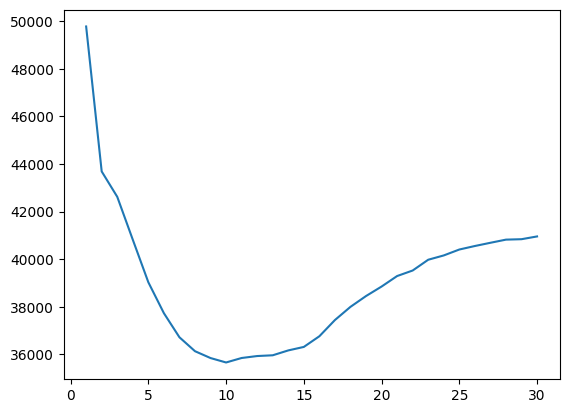

In [71]:
def get_salary_delta_avg(k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)

    salaries_df["Predicted Salary (Hyper)"] = y_pred
    salaries_df["Salary Delta (Hyper)"] = (salaries_df["Annual Salary"] - salaries_df["Predicted Salary (Hyper)"]).abs()
    result = salaries_df["Salary Delta (Hyper)"].mean()
    return result

ks = pd.Series(range(1, 31))
ks.index = range(1, 31)
test_errs = ks.apply(get_salary_delta_avg)

test_errs.plot.line()
test_errs.sort_values()

The results from hyperparameter testing above show that the K value we selected for our model produces the lowest average salary delta.

We will now look at the average salary delta value across different demographic variables like age and gender, as well as education level. Race will not be analyzed in our investigation because the possible categories for the Race variable in the second dataset are too complicated.

<Axes: title={'center': 'Difference Between Predicted and Actual Salary by Gender'}, xlabel='Gender', ylabel='Salary Delta'>

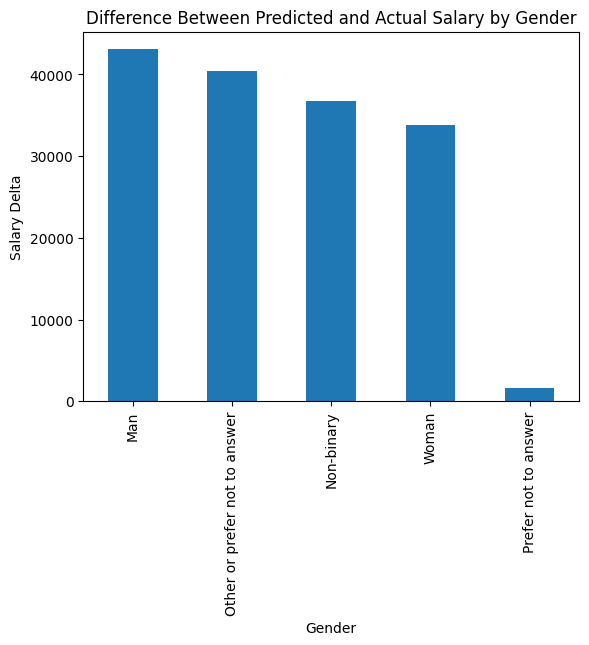

In [72]:
salaries_df.groupby("Gender")["Salary Delta"].mean().sort_values(ascending=False).plot.bar(ylabel="Salary Delta", xlabel="Gender", title="Difference Between Predicted and Actual Salary by Gender")

The bar graph shows the average salary delta grouped by gender. We are choosing to ignore 'other' and 'prefer not to answer' responses in our gender analysis. Men actually have the highest average salary delta with a value about halfway between 40,000 and 45,000 USD, followed by nonbinary individuals with an average salary delta value close to the middle between 35,000 and 40,000 USD, and then women with an average salary delta not far below 35,000 USD. Women coming in third may be surprising to some as women are often believed to have salaries that differ the most from what they should be earning. However, men may have the highest average salary delta because their salaries are higher than the expectation by a larger margin than women's salaries are lower than the expectation. In the context of the dataset, one potential cause for men's higher average salary delta is the fact that more individuals who took the responsed that their gender was female so the male average salary delta is based on less values.

In [73]:
salaries_df.groupby("Gender")["Salary Delta"].mean()[[0,1,4]].mean()

37889.78239898508

The average of the average salary deltas for the man, woman, and non-binary categories in the Gender column is 37889.78.

<Axes: title={'center': 'Difference Between Predicted and Actual Salary by Age'}, xlabel='Age', ylabel='Salary Delta'>

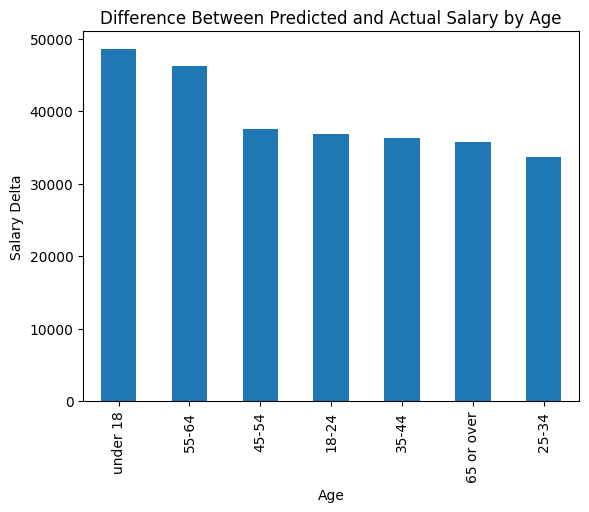

In [74]:
salaries_df.groupby("Age")["Salary Delta"].mean().sort_values(ascending=False).plot.bar(ylabel="Salary Delta", xlabel="Age", title="Difference Between Predicted and Actual Salary by Age")

The bar graph depicting the average salary delta grouped by age. The highest average salary delta occurrs in the under 18 age range, followed by 55-64, 45-54, 18-24, 35-44, 65 or over, and then 25-34. Employees under 18 having the highest average salary delta because they might be doing work that has a significantly higher expected salary than what they are actually paid due to their young age. The 55-64 range being second could be because by these ages one's skill and merit has a greater impact on their actual salary. A talented worker who is aged 55-64 may be compensated more generally to reflect the established value they add. On the other hand, someone in this age range who is not the best worker may receive less because they were hired after having a negative reputation up to that point. The under 18 and 55-64 ranges have average salary deltas closer to 50,000 than 40,000 USD. All the other ranges have average salary deltas between 30,000 and 40,000 USD. The 45-54, 18-24, 35-44, and 25-34 ranges all may have lower average salary deltas because the workers in these ranges are less distinguished, both positively and negatively, and experience less variation in salary. The lower average salary delta for individuals aged 65 or over might be influenced by retirement considerations or a shift to part-time roles. These workers may move into jobs that generally pay less money which will have less variation in salary on the high end.

In [75]:
salaries_df.groupby("Age")["Salary Delta"].mean().mean()

39252.9279575972

The average of all the average salary deltas for each category in the Age column is 39252.93.

<Axes: title={'center': 'Difference Between Predicted and Actual Salary by Education'}, xlabel='Education', ylabel='Salary Delta'>

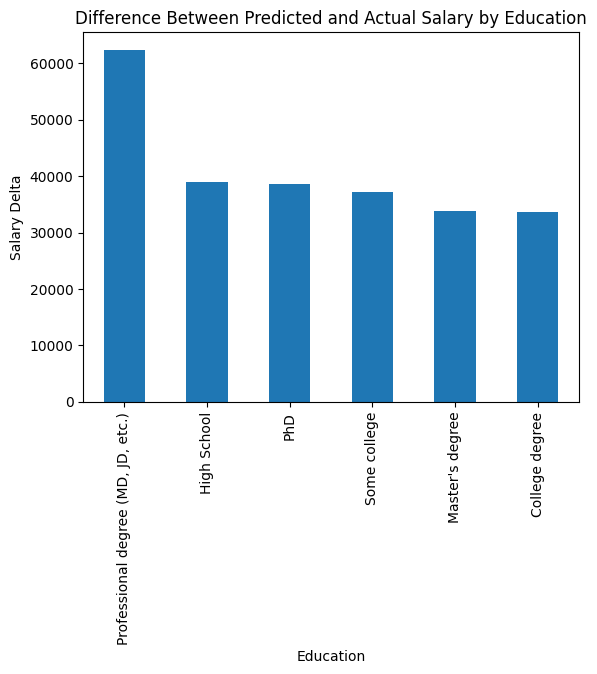

In [76]:
salaries_df.groupby("Education")["Salary Delta"].mean().sort_values(ascending=False).plot.bar(ylabel="Salary Delta", xlabel="Education", title="Difference Between Predicted and Actual Salary by Education")


The bar graph illustrating the average salary delta by education level shows individuals holding professional college degrees as experiencing the highest average salary deltas, followed by those with high school diplomas, Ph.D. qualifications, some college education, a master's degree, and finally, a college degree. This pattern might be attributed to the specific skill sets and expertise associated with each educational level. Professions that require professional college degrees may be in high demand and will provide higher salaries due to specialized knowledge and training. Jobs requiring professional degrees may also have many individuals earning more than expected because the relationship between increase in salary and years of experience can be far from linear for those with an MD or JD. Doctors and lawyers that have been around long enough to achieve a certain level of experience are compensated as such. People with a high school diploma and those with a PhD are the next two in order of highest average salary delta. Although these education levels are on opposite sides of the spectrum, both people who only attended high school and those with a PhD can get paid much differently than expected. Someone with only a high school diploma may get paid less for a certain position because they are underqualified. The opposite is true for people with a PhD. The same logic as the high school graduate applies for the education level with the next highest average salary delta, people who attended some college but did not graduate. The lower observed average salary delta for individuals with college degrees and master's degrees might reflect that these people more closely fit the qualifications for their jobs and their actual salaries therefore differ less from what salaries are expected.

In [77]:
salaries_df.groupby("Education")["Salary Delta"].mean().mean()

40769.758876291795

The average of all the average salary deltas for each category in the Age column is 40769.76.

In [78]:
selected_columns = salaries_df[["Job Title", "Location", "Mapped Experience (In Field)", "Age", "Gender", "Education", "Predicted Salary", "Annual Salary", "Salary Delta"]]
selected_columns.sort_values(by=["Salary Delta"])

Job Title        Location  \
5470                                   program manager      Austin, TX   
16450                       talent acquisition advisor     Seattle, WA   
19559            program management department manager        Novi, MI   
4841                         communications specialist  Washington, DC   
16342                                   office manager  Greensboro, NC   
...                                                ...             ...   
7659                             senior policy advisor          DC, DC   
5666                       principal software engineer      Boston, MA   
4792   attending physician (general internal medicine)   New Haven, CT   
1712                                    owner and ceo    New York , NY   
21275                             inside sales manager   Pinebrook, NJ   

      Mapped Experience (In Field)    Age Gender  \
5470                     Associate  35-44  Woman   
16450                     Director  45-54    Man   
19559                     Director  35-44  Woman   
4841                     Associate  35-44  Woman   
16342                    Executive  55-64  Woman   
...                            ...    ...    ...   
7659                      Director  35-44  Woman   
5666                     Associate  25-34    Man   
4792                     Associate  25-34  Woman   
1712                      Director  55-64  Woman   
21275                     Director  55-64  Woman   

                                Education  Predicted Salary  Annual Salary  \
5470                                  PhD         94990.000      95000.000   
16450                      College degree         93788.000      93800.000   
19559                      College degree         99837.650      99850.000   
4841                      Master's degree         93016.750      93000.000   
16342                        Some college         67982.000      68000.000   
...                                   ...               ...            ...   
7659                                  PhD         84760.000    1334782.000   
5666                      Master's degree        149470.000    1650000.000   
4792   Professional degree (MD, JD, etc.)        110419.800    1900000.000   
1712                      Master's degree         90144.000    3000000.000   
21275                     Master's degree         77476.100    5000044.000   

       Salary Delta  
5470         10.000  
16450        12.000  
19559        12.350  
4841         16.750  
16342        18.000  
...             ...  
7659    1250022.000  
5666    1500530.000  
4792    1789580.200  
1712    2909856.000  
21275   4922567.900  

[22447 rows x 9 columns]

We will now look at the five lowest and highest values in the average salary delta column. Applying our analysis of the bar graphs above, three of the five smallest salary deltas are for people with a college degree or master's degree, the last two column in the education graph, four of the five are for women, the last column we considered in the gender graph, and four of the five are also in the either the 35-44 or 45-54 age ranges, two of the five columns that have the lowest average salary deltas in the age graph. Two of the five largest salary deltas are for people with a professional degree or a PhD, two of the three first columns in the education graph, only one of the five is for a man, the first column we considered in the gender graph, and two of the five are also in the 55-64 age range, the second column in the age graph. The greater amount of demographic values that indicate higher salary deltas among the five highest salary deltas gives an idea for why these individuals have such high deltas.

<Axes: xlabel='Gender', ylabel='Age'>

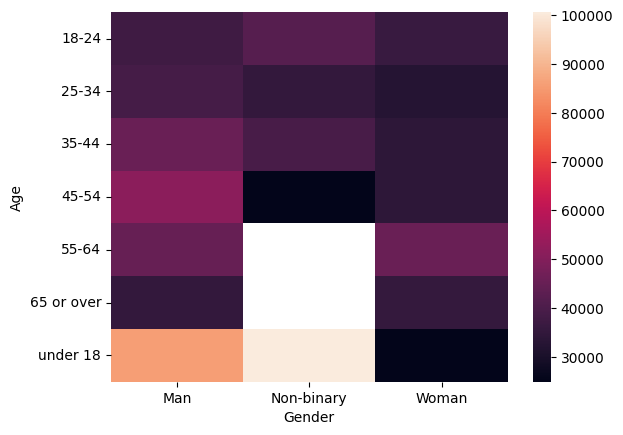

In [79]:
all_answered_norm = salaries_df[~((salaries_df["Gender"] == "Prefer not to answer") | (salaries_df["Gender"] == "Other or prefer not to answer"))]

sns.heatmap(all_answered_norm.pivot_table(
    index="Age", columns=["Gender"],
    values="Salary Delta", aggfunc=np.mean))

The heatmap showing average salary deltas for combinations of age and gender does not depict any surprising results. The combinations with the highest average salary deltas are an age of under 18 and a gender of man and an age of under 18 and a gender of non-binary. The under 18 age range has the highest average salary deltas of all the age ranges and the male and non-binary genders have the two highest average salary deltas of all the genders. The age of under 18 and gender of woman combination having such a low average salary delta is due to the female gender having the lowest average salary delta of all the genders, which seems to cancel out the high average salary delta of the under 18 age range.

<Axes: xlabel='Education', ylabel='Age'>

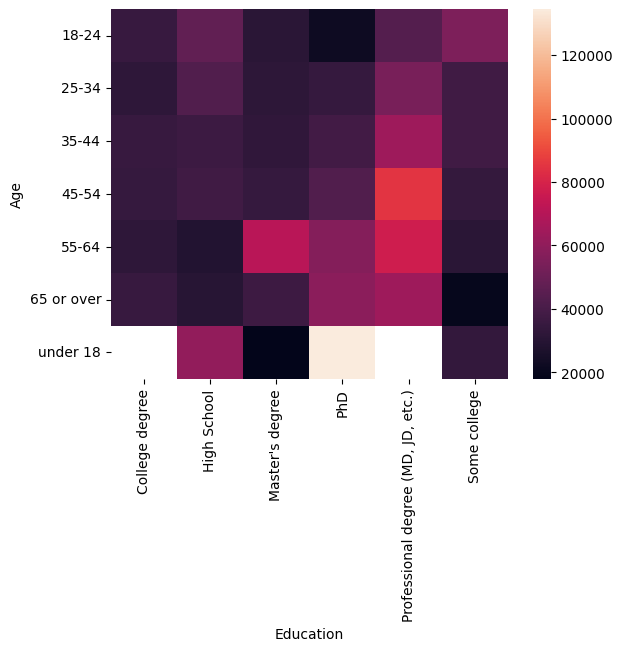

In [80]:
sns.heatmap(salaries_df.pivot_table(
    index="Age", columns=["Education"],
    values="Salary Delta", aggfunc=np.mean))

In [81]:
salaries_df[(salaries_df["Age"] == "under 18") & (salaries_df["Education"] == "PhD")]

index          Timestamp       Age     Industry Job Title  \
9730   9775  4/28/2021 8:06:50  under 18  Health care    doctor   

     Additional Job Title Context  Annual Salary  Additional Compensation  \
9730                          NaN     220000.000                 5000.000   

     Currency Other Currency Type Additional Income Context        Country  \
9730      USD                 NaN                       NaN  United States   

     U.S. State  City Professional Experience Overall  \
9730       Utah  Utah                     2 - 4 years   

     Professional Experience In Field Education      Gender  \
9730                   1 year or less       PhD  Non-binary   

                         Race Mapped Experience (In Field) State Abbreviation  \
9730  Asian or Asian American                   Internship                 UT   

      Location  location formatted_experience_level   title  Predicted Salary  \
9730  Utah, UT  Utah, UT                 Internship  doctor         85550.000   

      Salary Delta  Predicted Salary (Hyper)  Salary Delta (Hyper)  
9730    134450.000                102636.450            117363.550

The most interesting part of the heatmap showing average salary deltas for combinations of age and education is the under 18 age range and an individual with a PhD combination. First of all, anyone who is under 18 and has a doctorate is extremely unique. The average salary delta of this combination is much higher than any other combination in the visualization. The under 18 age range and PhD education level both have high average salary deltas relative to the other possible categories for these variables. As seen from the displayed row for the only person with this combination, the potential for a lower actual than expected salary because of the under 18 age range is outweighted by the potential for a higher actual than expected salary because of the PhD.

<Axes: xlabel='Gender', ylabel='Education'>

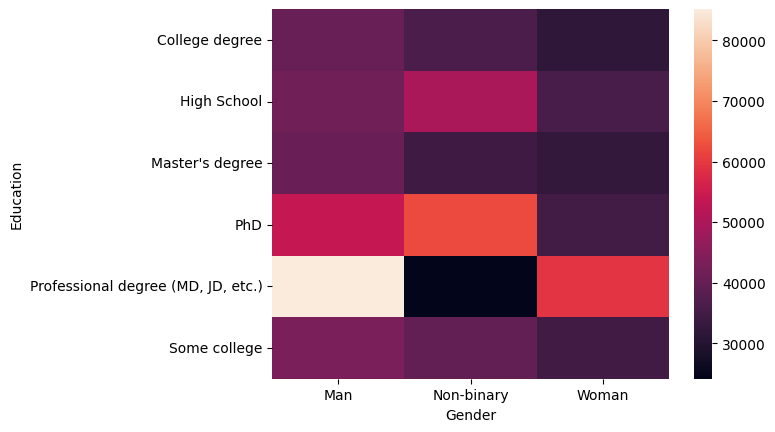

In [82]:
sns.heatmap(all_answered_norm.pivot_table(
    index="Education", columns=["Gender"],
    values="Salary Delta", aggfunc=np.mean))

The heatmap visualizing average salary deltas for education and gender combinations shows that the professional degree and man combination has the highest average salary delta by far. This result makes sense because a professional degree has the highest average salary delta of all the education levels and male gender has the highest average salary delta of all the genders.

**Conclusion:** Our data science investigation into the relationship between demographic information and the difference between expected and actual salary has provided valuable insights. We initiated our analysis by addressing two fundamental questions: "How do the qualities of a job position affect listed salary?" and "How does demographic information impact actual salary?" Utilizing comprehensive datasets sourced from LinkedIn job postings and the "Ask a Manager" salary survey, we navigated through the data science lifecycle to search for answers.

Our exploration of job qualities, such as job title, location, and experience level, has unveiled intriguing findings and answered "How do the qualities of a job position affect listed salary?". For job titles, we identified the most common ones and found their mean average salaries, with certain positions like "Controller" and "Sales Manager" commanding some of the highest salaries. Geographically, we observed the variety of mean average salaries across states and regions, with the Northeast and West generally offering higher mean average salaries. Additionally, work experience level emerged as a significant factor, with director-level roles commanding the highest mean average salary. We discussed how certain values within each of these characteristics maximize and minimize mean average salary and that one should focus on optimizing these values to achieve the best possible salary for themselves.

Now, we will answer our second question, "How does demographic information impact actual salary?". The analysis of demographic influences on average salary delta revealed disparities across gender, age, and education levels. Based on our analysis, education level affects average salary delta the most, followed by age and then gender. The means of all the average salaries deltas across each of the categories for these variables are 40769.76, 39252.93, and 37889.78, respectively. Notably, men experience a higher average salary delta compared to nonbinary individuals and women, signaling potential gender-based disparities. Age-wise, those under 18 and in the 55-64 range exhibit the highest average salary deltas, indicative of the impact of experience, both when one lacks it and has a surplus. Education-wise, professional degrees were associated with the highest average salary deltas, suggesting a link between specialized knowledge and increased earning potential.

 We now know which demographic variables have the greatest bearing on actual salary and average salary delta. We also know the categories within each of these variables that affect actual salary and average salary delta the most. "How does demographic information impact actual salary?" has been answered. While job-related qualities play a crucial role, addressing the effect of gender and age on wage requires careful consideration of societal biases and workplace practices. Our journey through the data science lifecycle has provided us valuable insights that contribute to the ongoing conversation on fair compensation practices. Our advice at the personal level is to do your best not to focus on how the qualities you cannot change contribute to the dollar amount on your paychecks. Instead, give your attention to what you can change, your education level. After all, our investigation concluded that education level has the largest influence on the difference between your expected and actual salary. Work hard to finish your degree. If you have already finished your academic career, the time always exists to go back to school. The effort will be worth it.

**What's Next:** Our hope is to update our investigation with datasets that have a greater number of observations and more job characteristics that cross over between the two datasets so the regression model can be further fleshed out. These improvements should lower the average salary delta considerably for all observations. Stay tuned for updates and how our findings progress. Thanks for reading. We appreciate it.